# Import libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import math
from geopy.geocoders import Nominatim
import re

# Load dataset

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
print(df.info())
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

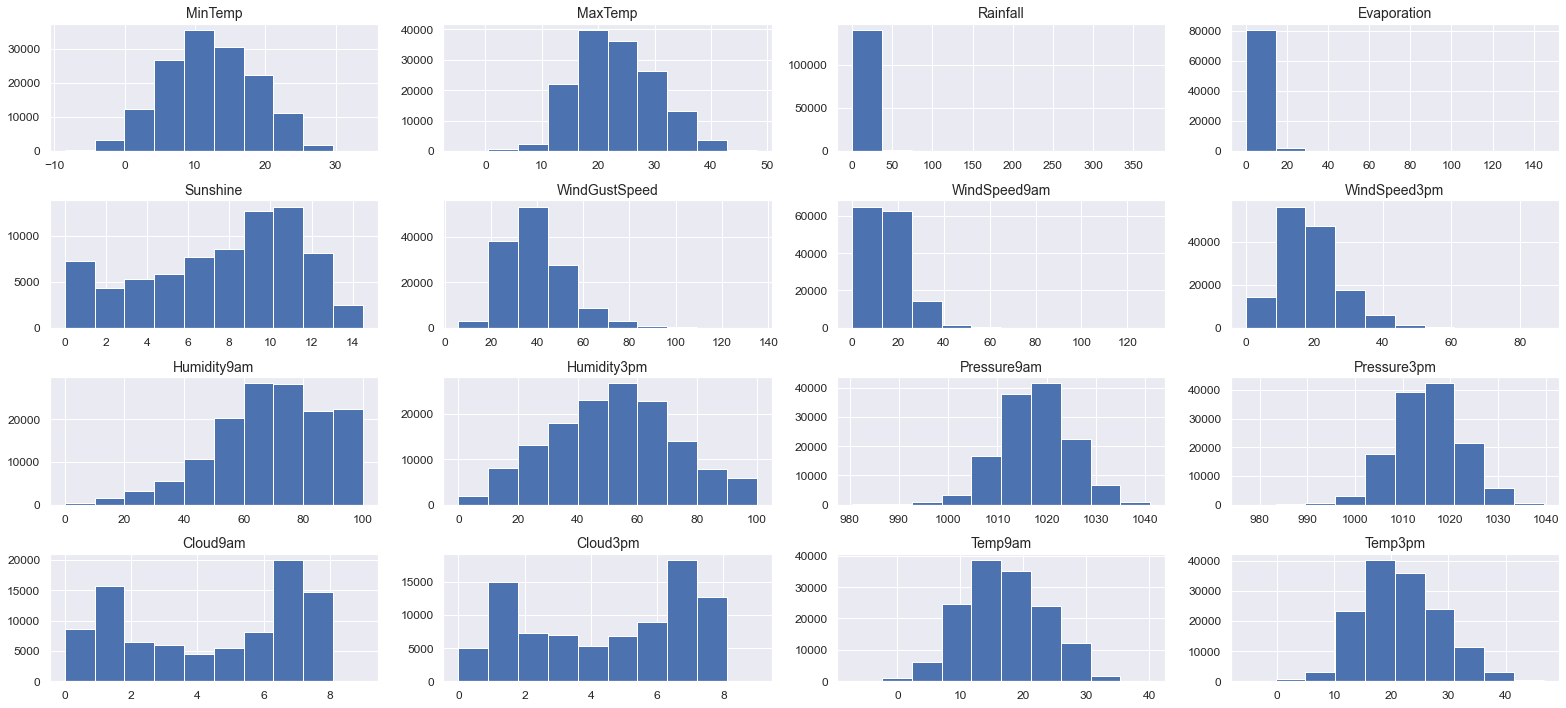

In [8]:
def display_dataset_distributions(dataset,bins=10):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10),bins=bins)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
display_dataset_distributions(df)

In [5]:
# fig = plt.figure(figsize=(15,5)), sns.distplot(df['Sunshine'])
# fig = plt.figure(figsize=(15,5)), plt.scatter(1/df['Sunshine'],df['Cloud3pm'])
# fig = plt.figure(figsize=(25,5)), df.boxplot()

# Add RainfallTomorrow

In [9]:
df['RainfallTomorrow']=df['Rainfall'].shift(-1)
df['RainfallYesterday']=df['Rainfall'].shift(1)

# Delete the first and the last element of each city
remove_index = []
for l in pd.unique(df['Location']):
    remove_index.append(df.index[df['Location'] == l][0])
    remove_index.append(df.index[df['Location'] == l][-1])

df.drop(df.index[np.array(remove_index)],inplace=True)
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,RainfallYesterday
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0,0.6
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0,0.0


# Split into Train Test

In [7]:
df = df[df['RainTomorrow'].notna()]
# df = df[df['RainfallTomorrow'].notna()]
print(((1-df.count()/df.count().max())*100))

Date                  0.000000
Location              0.000000
MinTemp               0.448260
MaxTemp               0.225889
Rainfall              0.989409
Evaporation          42.780338
Sunshine             47.686570
WindGustDir           6.560642
WindGustSpeed         6.518419
WindDir9am            7.041976
WindDir3pm            2.655079
WindSpeed9am          0.947891
WindSpeed3pm          1.847929
Humidity9am           1.246965
Humidity3pm           2.536857
Pressure9am           9.855389
Pressure3pm           9.831463
Cloud9am             37.735477
Cloud3pm             40.151297
Temp9am               0.635446
Temp3pm               1.915485
RainToday             0.989409
RainTomorrow          0.000000
RainfallTomorrow      0.000000
RainfallYesterday     1.408817
dtype: float64


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['RainTomorrow'], axis=1),
    df['RainTomorrow'],
    test_size=0.15,
    random_state=0)

print("X_train.shape, X_test.shape = ")
print(X_train.shape, X_test.shape)

print("\ny_train = ")
print(y_train)

X_train.shape, X_test.shape = 
(123557, 24) (21805, 24)

y_train = 
36409     Yes
46379      No
12728     Yes
121724    Yes
24680      No
         ... 
42020     Yes
97704      No
96002      No
118031     No
43596      No
Name: RainTomorrow, Length: 123557, dtype: object


In [11]:
X_train['RainTomorrow']=y_train

# Drop columns

In [12]:
print(((1-df.count()/df.count().max())*100))

Date                  0.000000
Location              0.000000
MinTemp               1.019524
MaxTemp               0.859922
Rainfall              2.241301
Evaporation          43.157084
Sunshine             48.000853
WindGustDir           7.091950
WindGustSpeed         7.048610
WindDir9am            7.263246
WindDir3pm            2.903785
WindSpeed9am          1.213522
WindSpeed3pm          2.102338
Humidity9am           1.822347
Humidity3pm           3.095032
Pressure9am          10.356902
Pressure3pm          10.330760
Cloud9am             38.422009
Cloud3pm             40.805025
Temp9am               1.212834
Temp3pm               2.477952
RainToday             2.241301
RainTomorrow          2.240613
RainfallTomorrow      2.240613
RainfallYesterday     2.242677
dtype: float64


In [13]:
X_train.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Date'],axis=1,inplace=True)
drop_columns = []

# Variable Encoding

## Binaries

In [14]:
y_train.replace({"No":0,"Yes":1},inplace=True)
X_train.replace({"No":0,"Yes":1},inplace=True)

## Wind Direction

In [15]:
labels = np.array(pd.unique(df[['WindGustDir', 'WindDir9am', 'WindDir3pm']].values.ravel('K')),dtype=np.str)
labels = np.delete(labels, np.argwhere(labels=='nan'))
print(labels)

['WNW' 'WSW' 'NE' 'W' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']


![cardenal_points](./cardenal_points.png)

In [16]:
# def wind_dir_circular_representation(dir):
#     return np.cos(2 * np.pi * (dir/16)), np.sin(2 * np.pi * (dir/16))

windDirDic = {
    "E": 0,
    "ENE": 1,
    "NE": 2,
    "NNE": 3,
    "N": 4,
    "NNW": 5,
    "NW": 6,
    "WNW": 7,
    "W": 8,
    "WSW": 9,
    "SW": 10,
    "SSW": 11,
    "S": 12,
    "SSE": 13,
    "SE": 14,
    "ESE": 15,
}

X_train.replace(windDirDic,inplace=True)

X_train.head(3)

# # Cyclic encoding is implemented after imputation
# wind_dir_colums = ['WindGustDir','WindDir9am','WindDir3pm']
# for wd in wind_dir_colums:
#     X_train[wd+'_cos'] = np.cos(2 * np.pi * (X_train[wd]/16))
#     X_train[wd+'_sin'] = np.sin(2 * np.pi * (X_train[wd]/16))

# # X_train.drop(wind_dir_colums,axis=1, inplace=True)
# drop_columns+=wind_dir_colums

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainfallTomorrow,RainfallYesterday,RainTomorrow
36409,SydneyAirport,18.1,23.8,31.0,15.0,50.0,13.0,12.0,22.0,35.0,67.0,67.0,1022.0,1021.7,21.8,23.1,1.0,13.4,1.8,1.0
46379,Canberra,19.0,30.4,0.2,NaN,NaN,NaN,NaN,NaN,NaN,50.0,41.0,NaN,NaN,23.5,28.8,0.0,0.0,0.0,0.0
12728,Moree,14.7,20.1,0.0,10.0,44.0,11.0,0.0,13.0,9.0,80.0,82.0,1017.0,1016.8,18.5,17.6,0.0,12.4,8.8,1.0


## Location

In [17]:
def get_name_with_space(loc):
    return re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', loc)

In [18]:
locations = np.array(X_train['Location'].unique(),dtype=np.str)
locations = [get_name_with_space(loc) for loc in locations]

locations_coord = []
geocoder = Nominatim(user_agent = '_')
for loc in locations:
    location = geocoder.geocode(loc+' Australia')
    if location:
        lon=location.longitude
        lat=location.latitude
        locations_coord.append({"name":loc,"lon":lon,"lat":lat})
    else:
         raise Exception('no coordinates could be found for '+str(loc))

locations_df = pd.DataFrame.from_dict(locations_coord)

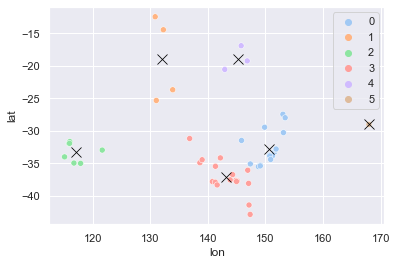

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import haversine_distances
X = locations_df.drop(['name'],axis=1)
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
cluster = kmeans.labels_
fig = plt.figure()
sns.scatterplot(x='lon',y='lat',data=locations_df,hue=cluster,palette='pastel')
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],marker="x",s=100,color="0")

In [18]:
locations_df["type"] = cluster
locations_df

,name,lon,lat,type
0,Melbourne Airport,144.833481,-37.667111,5
1,Perth Airport,115.967608,-31.940610,2
2,Albany,117.883608,-35.024782,2
3,Mount Ginini,148.772635,-35.529720,1
4,Mount Gambier,140.782007,-37.824670,5
5,Sale,147.064790,-38.105036,5
6,Moree,149.840715,-29.461720,1
7,Ballarat,143.860565,-37.562303,5
8,Pearce RAAF,116.017544,-31.673960,2
9,Cobar,145.834444,-31.498333,1


In [19]:
X_train['LocationType'] = X_train.apply(
    lambda row: int(locations_df.loc[locations_df['name'] == get_name_with_space(row['Location'])].filter(['type']).values[0]), 
    axis=1)
    
print("Unique values in LocationType = "+str(pd.unique(X_train['LocationType'])))

Unique values in LocationType = [5 2 1 0 3 4]


In [20]:
y = X_train.LocationType.values
onehotencoder = OneHotEncoder(categories='auto',sparse=False)
y = onehotencoder.fit_transform(y.reshape(-1,1))
for i in range(y.shape[1]-1):
    X_train['LocationType_'+str(i)]=y[:,i]

# X_train.drop(['Location','LocationType'], axis=1, inplace=True)
drop_columns+=['Location','LocationType']
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,RainToday,RainfallTomorrow,RainfallYesterday,RainTomorrow,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4
66916,MelbourneAirport,6.7,14.2,3.2,9.0,57.0,8.0,9.0,24.0,39.0,...,1.0,1.6,20.4,1,5,0.0,0.0,0.0,0.0,0.0
118862,PerthAirport,12.7,20.7,3.0,8.0,24.0,4.0,6.0,9.0,13.0,...,1.0,0.0,1.4,0,2,0.0,0.0,1.0,0.0,0.0
110872,Albany,12.5,16.1,0.2,NaN,NaN,0.0,1.0,30.0,19.0,...,0.0,3.6,0.0,1,2,0.0,0.0,1.0,0.0,0.0
52439,MountGinini,6.2,21.5,0.0,8.0,39.0,9.0,10.0,17.0,19.0,...,0.0,0.0,NaN,0,1,0.0,1.0,0.0,0.0,0.0
101685,MountGambier,8.7,24.2,0.0,14.0,39.0,14.0,11.0,20.0,20.0,...,0.0,0.0,0.0,0,5,0.0,0.0,0.0,0.0,0.0


# Feature Selection / New Features

(<matplotlib.axes._subplots.AxesSubplot at 0x23135725e20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23135725e20>)

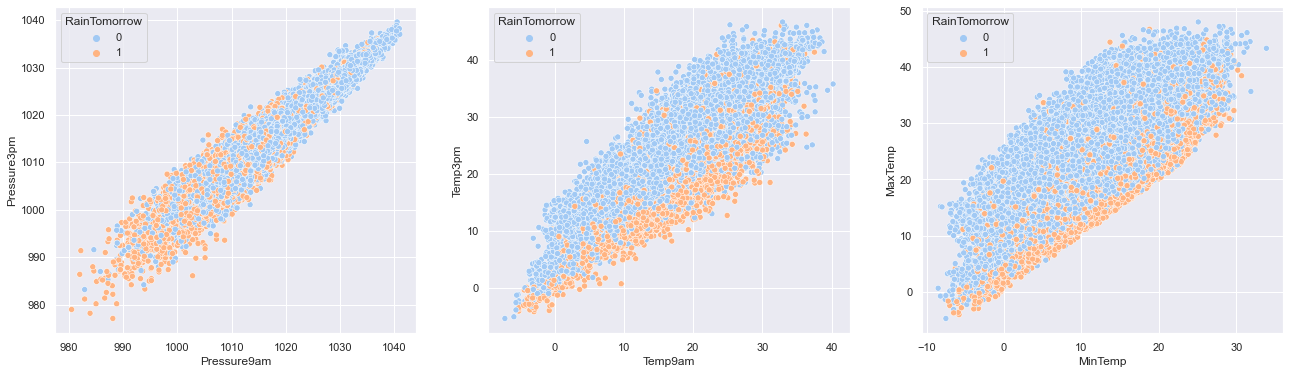

In [21]:
fig, axs = plt.subplots(1, 3,figsize=(22,6))

plt.subplot(1,3,1), sns.scatterplot(x='Pressure9am',y='Pressure3pm',hue=y_train,palette='pastel',data=X_train)
plt.subplot(1,3,2), sns.scatterplot(x='Temp9am',y='Temp3pm',hue=y_train,palette='pastel',data=X_train)
plt.subplot(1,3,3), sns.scatterplot(x='MinTemp',y='MaxTemp',hue=y_train,palette='pastel',data=X_train)

In [22]:
# Pressures
# Mean of colums. When one of the columns is NaN, the mean takes the value of the other column
X_train.Pressure3pm.fillna(X_train.Pressure9am, inplace=True)
X_train.Pressure9am.fillna(X_train.Pressure3pm, inplace=True)
press_mean = (X_train['Pressure3pm'] + X_train['Pressure9am'])/2
X_train['PressureMean'] = press_mean
X_train.drop('Pressure3pm', inplace=True, axis=1)
X_train.drop('Pressure9am', inplace=True, axis=1)

# Temperatures
temp_diff = X_train['Temp3pm'] - X_train['Temp9am']
X_train['TempDiff'] = temp_diff
# Mean of colums. When one of the columns is NaN, the mean takes the value of the other column
X_train.Temp3pm.fillna(X_train.Temp9am, inplace=True)
X_train.Temp9am.fillna(X_train.Temp3pm, inplace=True)
temp_mean = (X_train['Temp3pm'] + X_train['Temp9am'])/2
X_train['TempMean'] = temp_mean
X_train.drop('Temp3pm', inplace=True, axis=1)
X_train.drop('Temp9am', inplace=True, axis=1)

# Temperatures max-min
max_temp_diff = X_train['MaxTemp'] - X_train['MinTemp']
X_train['TempMaxDiff'] = max_temp_diff
X_train.drop('MinTemp', inplace=True, axis=1)

Percentage of NaN:
Location             0.000000
MaxTemp              0.227670
Rainfall             1.001747
WindGustDir          6.552749
WindGustSpeed        6.509699
WindDir9am           7.043688
WindDir3pm           2.629379
WindSpeed9am         0.937999
WindSpeed3pm         1.837088
Humidity9am          1.227761
Humidity3pm          2.519269
RainToday            1.001747
RainfallTomorrow     0.000000
RainfallYesterday    1.428110
RainTomorrow         0.000000
LocationType         0.000000
LocationType_0       0.000000
LocationType_1       0.000000
LocationType_2       0.000000
LocationType_3       0.000000
LocationType_4       0.000000
PressureMean         9.697903
TempDiff             2.274214
TempMean             0.234293
TempMaxDiff          0.601048
dtype: float64


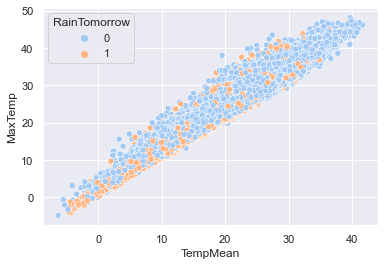

In [23]:
sns.scatterplot(x='TempMean',y='MaxTemp',hue=y_train,palette='pastel',data=X_train)
print("Percentage of NaN:")
print(((1-X_train.count()/X_train.count().max())*100))

In [24]:
X_train.drop('MaxTemp', inplace=True, axis=1)
X_train.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4,PressureMean,TempDiff,TempMean,TempMaxDiff
66916,MelbourneAirport,3.2,9.0,57.0,8.0,9.0,24.0,39.0,80.0,70.0,...,5,0.0,0.0,0.0,0.0,0.0,1008.15,1.4,12.30,7.5
118862,PerthAirport,3.0,8.0,24.0,4.0,6.0,9.0,13.0,90.0,54.0,...,2,0.0,0.0,1.0,0.0,0.0,1025.00,5.6,17.10,8.0
110872,Albany,0.2,NaN,NaN,0.0,1.0,30.0,19.0,73.0,76.0,...,2,0.0,0.0,1.0,0.0,0.0,1016.00,1.5,14.25,3.6
52439,MountGinini,0.0,8.0,39.0,9.0,10.0,17.0,19.0,48.0,30.0,...,1,0.0,1.0,0.0,0.0,0.0,NaN,8.0,16.90,15.3
101685,MountGambier,0.0,14.0,39.0,14.0,11.0,20.0,20.0,56.0,41.0,...,5,0.0,0.0,0.0,0.0,0.0,1024.75,6.3,19.95,15.5


(<matplotlib.axes._subplots.AxesSubplot at 0x23138b4ac40>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23138b4ac40>)

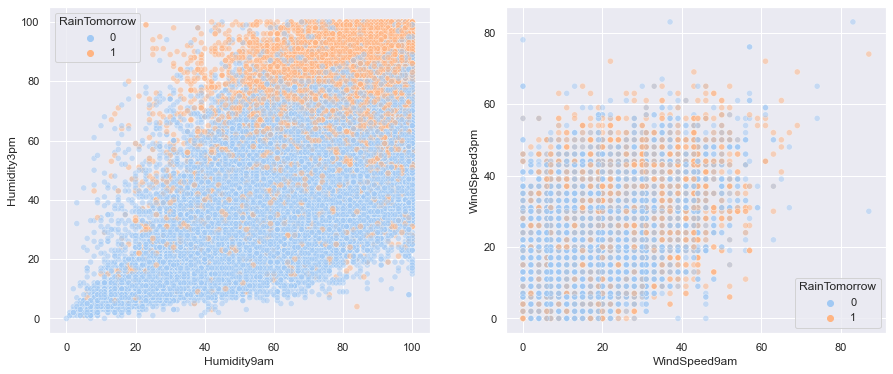

In [25]:
fig, axs = plt.subplots(1, 3,figsize=(15,6))

plt.subplot(1,2,1), sns.scatterplot(x='Humidity9am',y='Humidity3pm',hue=y_train,palette='pastel',alpha = .5, data=X_train)
plt.subplot(1,2,2), sns.scatterplot(x='WindSpeed9am',y='WindSpeed3pm',hue=y_train,palette='pastel',alpha = .5,data=X_train)

# Outliers

In [27]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    # histograma
    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    # qqplot    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

    fig.suptitle(variable, fontsize=16)
    
def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

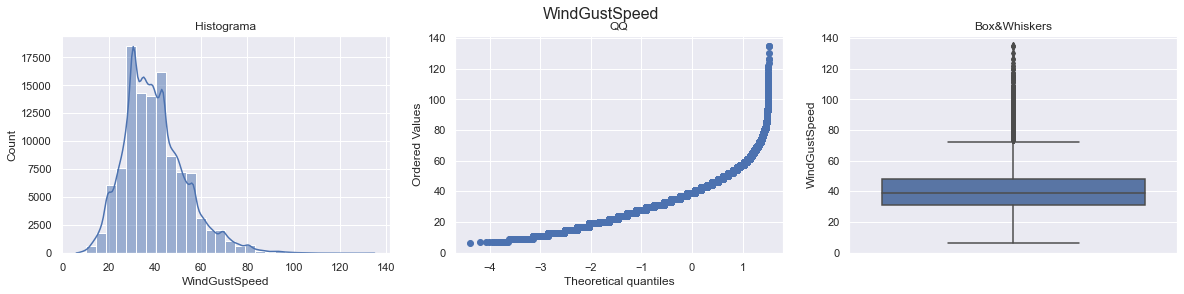

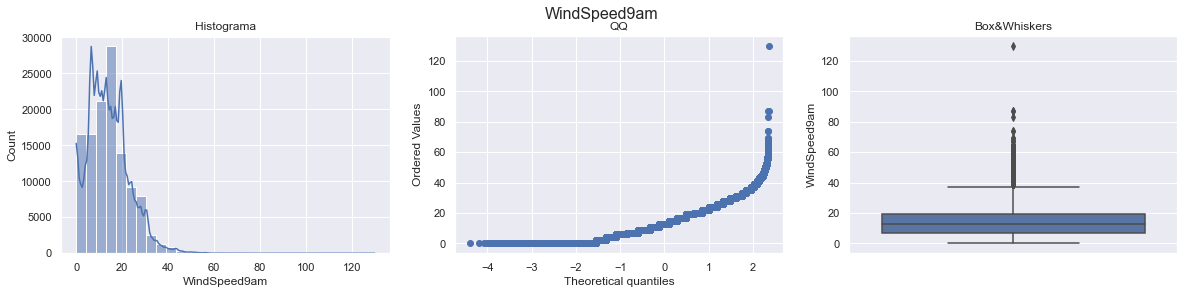

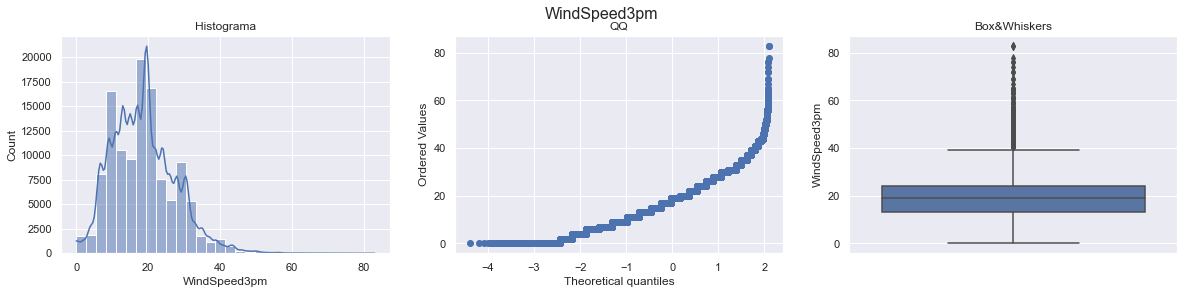

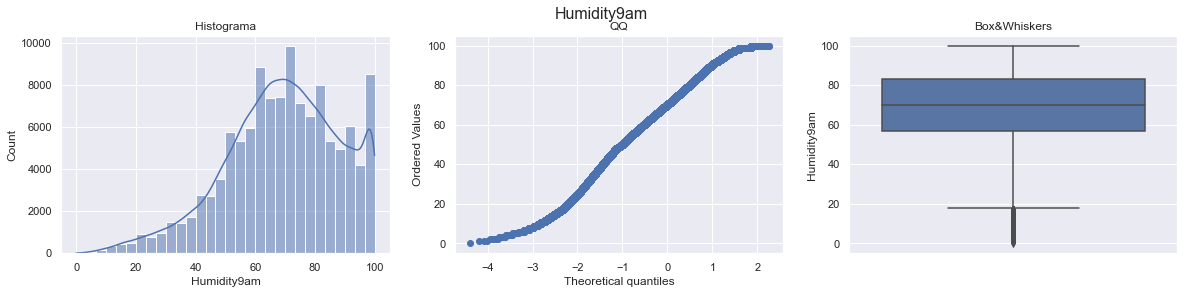

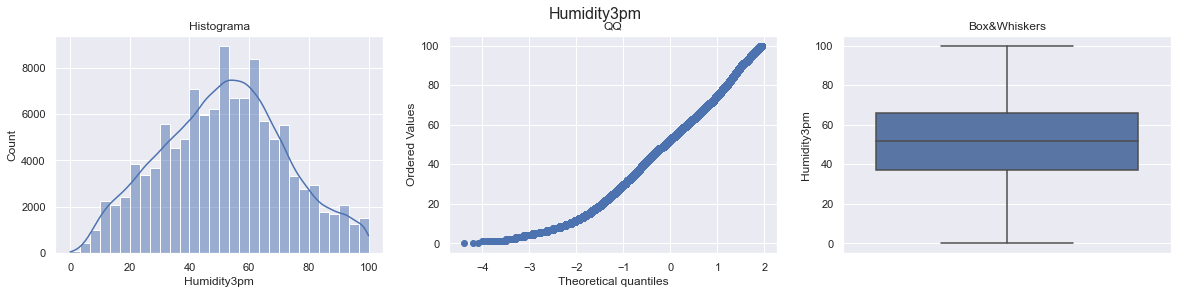

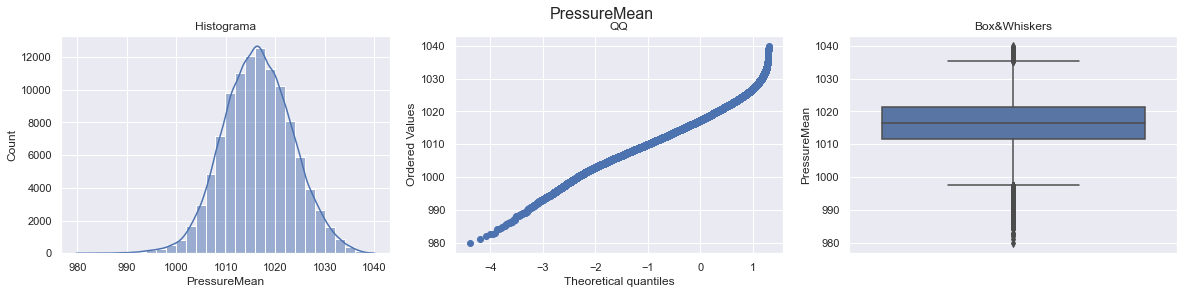

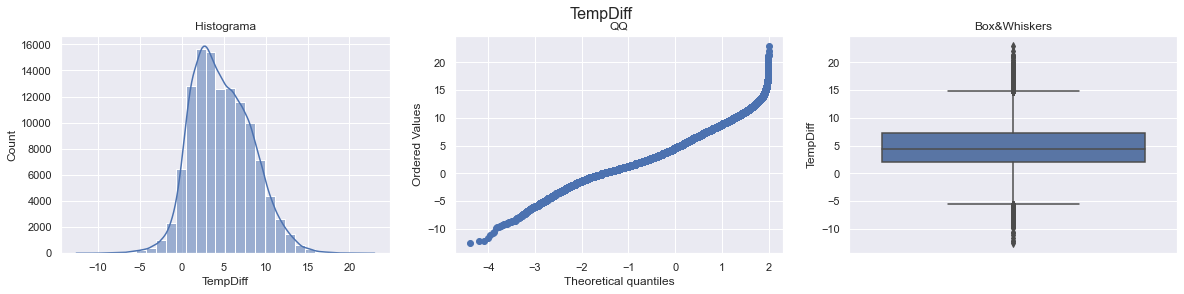

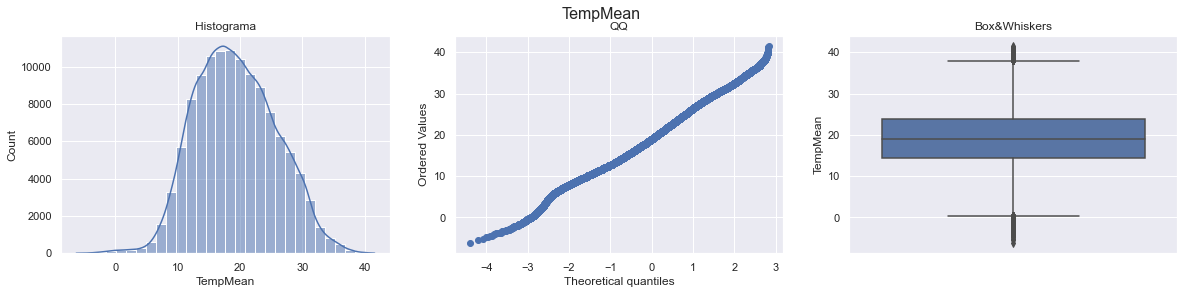

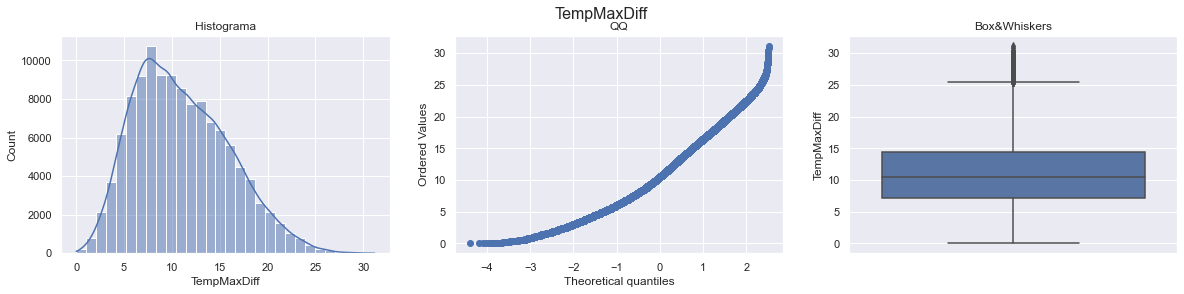

In [28]:
norm_col = [
    # 'Rainfall', 
    'WindGustSpeed', 
    'WindSpeed9am', 
    'WindSpeed3pm', 
    'Humidity9am',
    'Humidity3pm', 
    # 'RainfallYesterday',
    'PressureMean',
    'TempDiff', 
    'TempMean', 
    'TempMaxDiff'
]

for col in norm_col:
    outlier_diagnostic_plots(X_train, col)

In [29]:
# Trim outlier
# outliers_total = np.array(np.repeat(False,X_train.shape[0]))
# for col in cloumns_plot:
    
#     upper_limit, lower_limit = find_skewed_boundaries(X_train, col, 2.)
#     outliers = np.where(X_train[col] > upper_limit, True,
#                         np.where(X_train[col] < lower_limit, True, False))                        
#     outliers_total = np.logical_or(outliers_total, outliers)
    
#     print(str(col) + " outliers = "+str(outliers.sum()))

# print("Total outliers = "+str(outliers_total.sum()))

# X_train_trimmed = X_train.loc[~(outliers_total)]
# for col in cloumns_plot:
#     outlier_diagnostic_plots(X_train_trimmed, col)

# Capping outlier

# X_train_capped = X_train.copy()
# for col in cloumns_plot:
    
#     upper_limit, lower_limit = find_skewed_boundaries(X_train, col, 1.5)
#     X_train_capped[col] = np.where(X_train[col] > upper_limit, upper_limit,
#                           np.where(X_train[col] < lower_limit, lower_limit, X_train_capped[col]))

# for col in cloumns_plot:
#     outlier_diagnostic_plots(X_train_capped, col)

def transform_outliers(df, norm_col, threshold_capped=1.5, threshold_trimmed=1.8, use_manual_limits=False, 
                        upper_limit_trim=0, lower_limit_trim=0, upper_limit_cap=0, lower_limit_cap=0):
    # Trimming and capping outliers
    outliers_total = np.array(np.repeat(False,df.shape[0]))
    X_train_capped = df.copy()
    for col in norm_col:
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_trim, lower_limit_trim
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_trimmed)

        outliers = np.where(df[col] > upper_limit, True,
                            np.where(df[col] < lower_limit, True, False))                        
        outliers_total = np.logical_or(outliers_total, outliers)
        
        print(str(col) + " outliers = "+str(outliers.sum()))
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_cap, lower_limit_cap
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_capped)

        X_train_capped[col] = np.where(df[col] > upper_limit, upper_limit,
                            np.where(df[col] < lower_limit, lower_limit, X_train_capped[col]))

    print("Total outliers = "+str(outliers_total.sum()))
    X_train_trimmed = X_train_capped.loc[~(outliers_total)]

    return X_train_trimmed

WindGustSpeed outliers = 1434
WindSpeed9am outliers = 1127
WindSpeed3pm outliers = 1080
Humidity9am outliers = 294
Humidity3pm outliers = 0
PressureMean outliers = 286
TempDiff outliers = 265
TempMean outliers = 53
TempMaxDiff outliers = 81
Total outliers = 3644


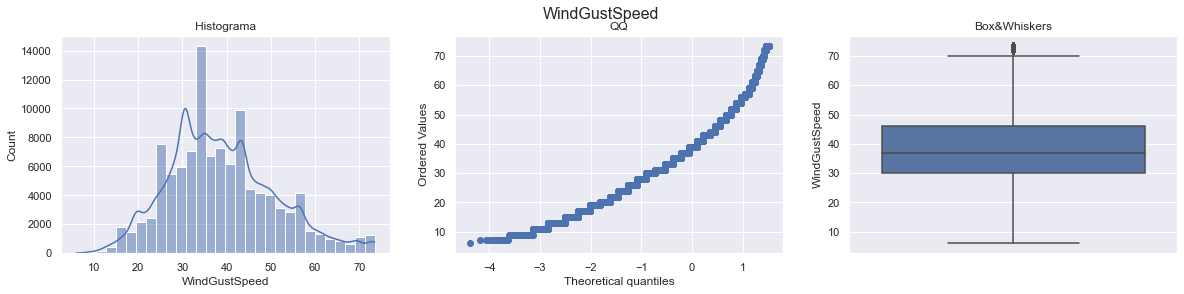

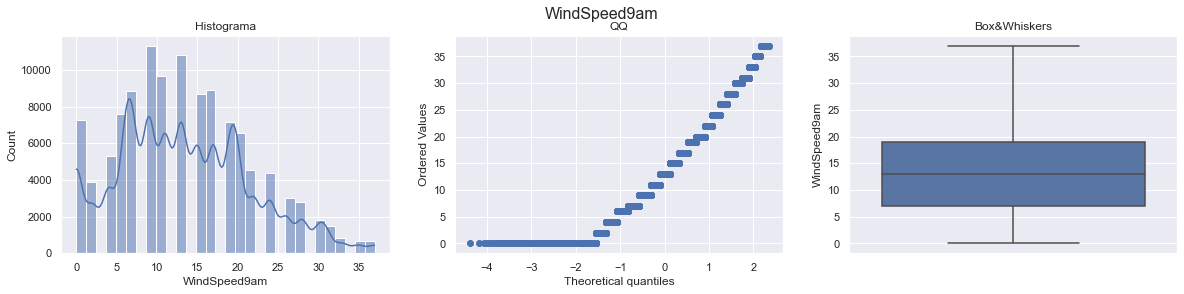

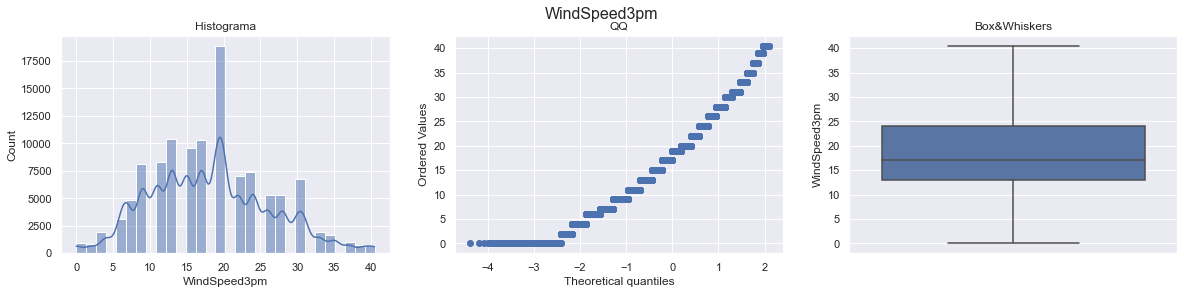

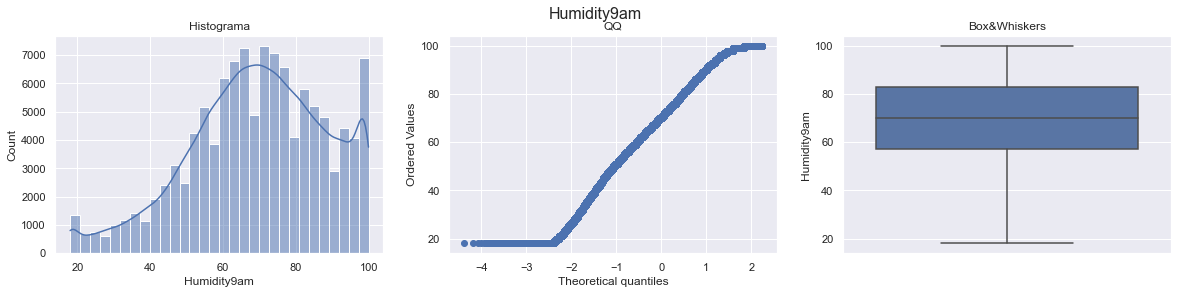

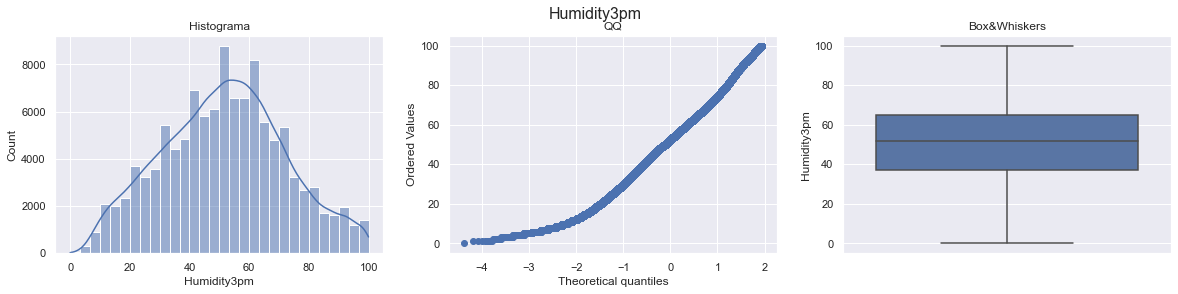

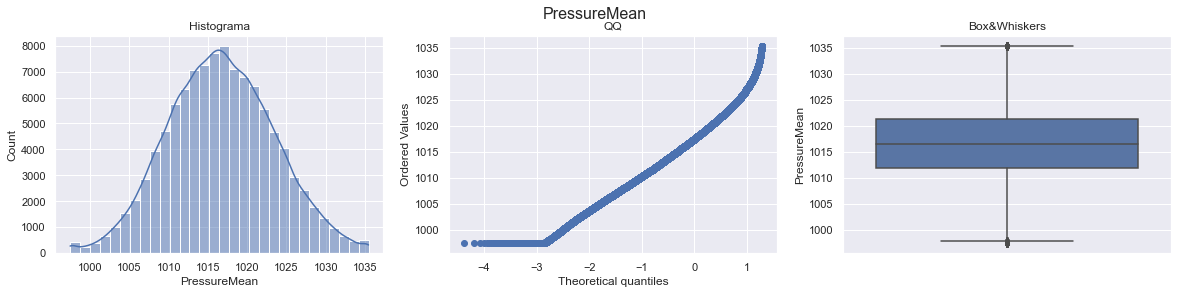

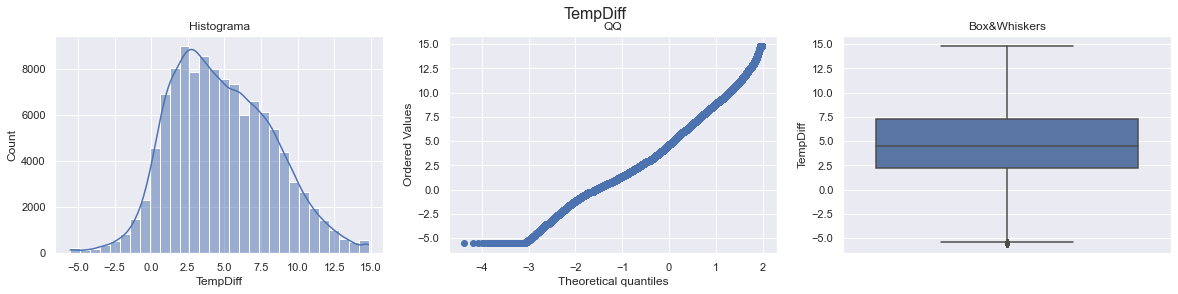

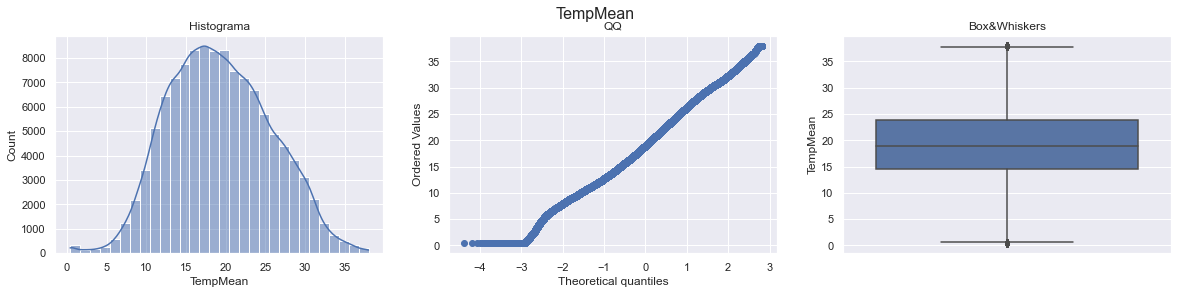

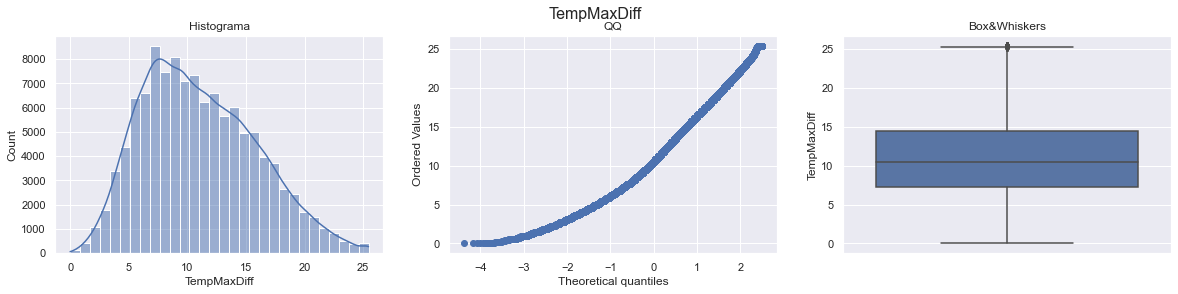

In [30]:
X_train_trimmed = transform_outliers(X_train, norm_col)

for col in norm_col:
    outlier_diagnostic_plots(X_train_trimmed, col)
    
X_train = X_train_trimmed

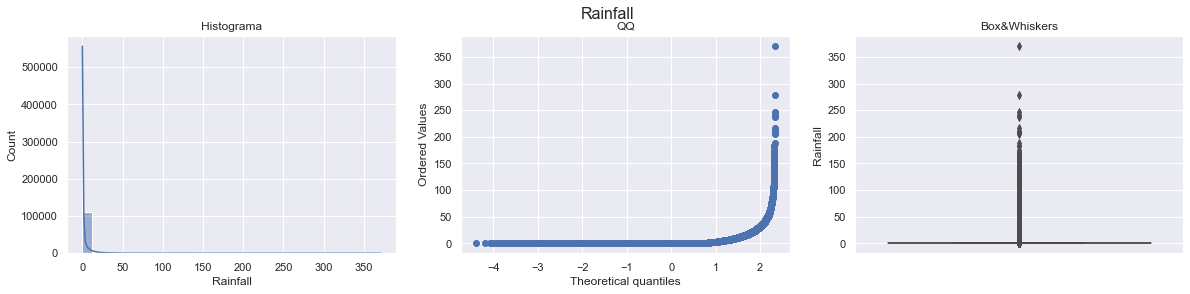

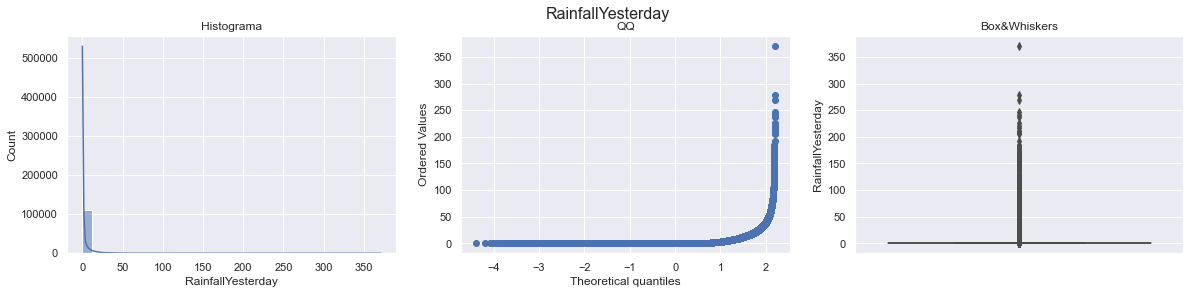

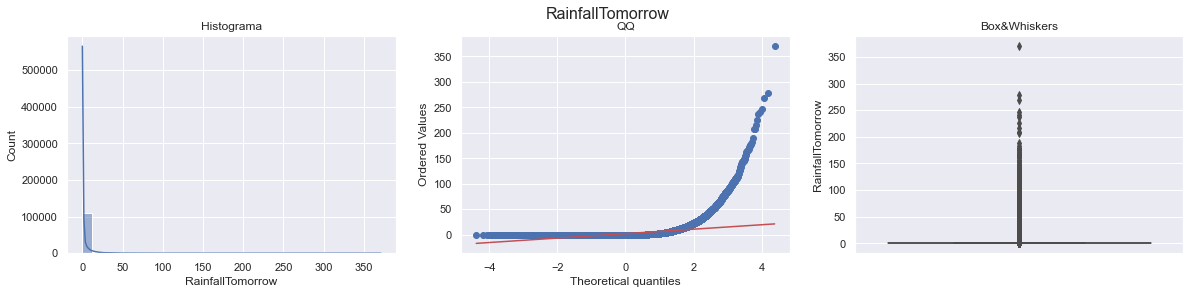

In [31]:
norm_rainfall = ['Rainfall','RainfallYesterday','RainfallTomorrow']
                        
for col in norm_rainfall:
    outlier_diagnostic_plots(X_train, col)

Rainfall outliers = 4643
RainfallYesterday outliers = 4779
RainfallTomorrow outliers = 4717
Total outliers = 11831


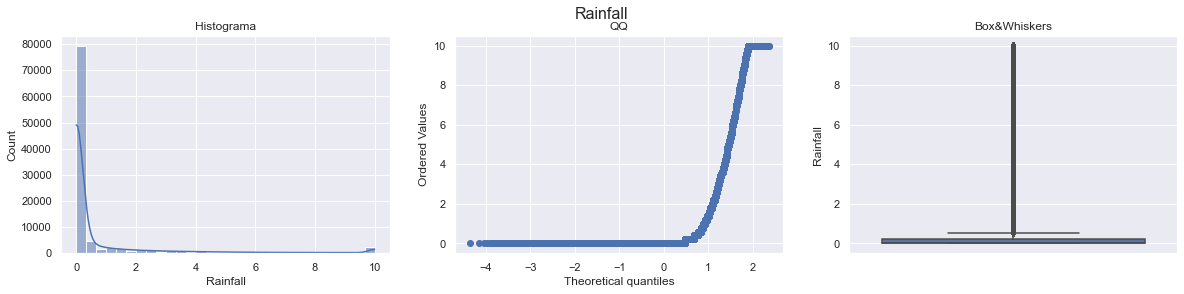

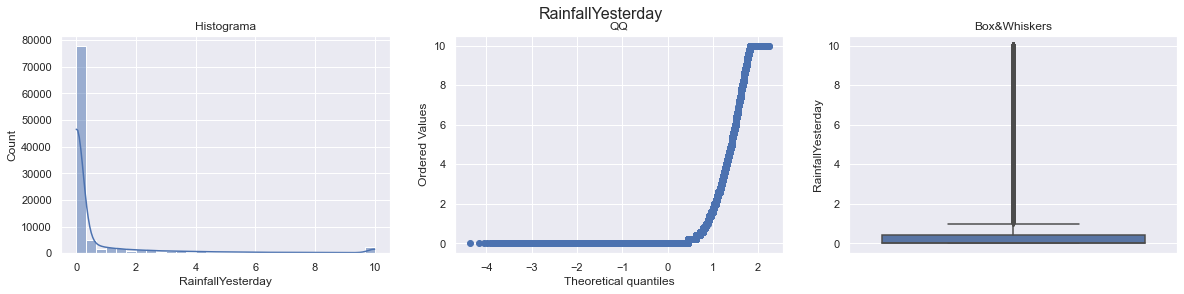

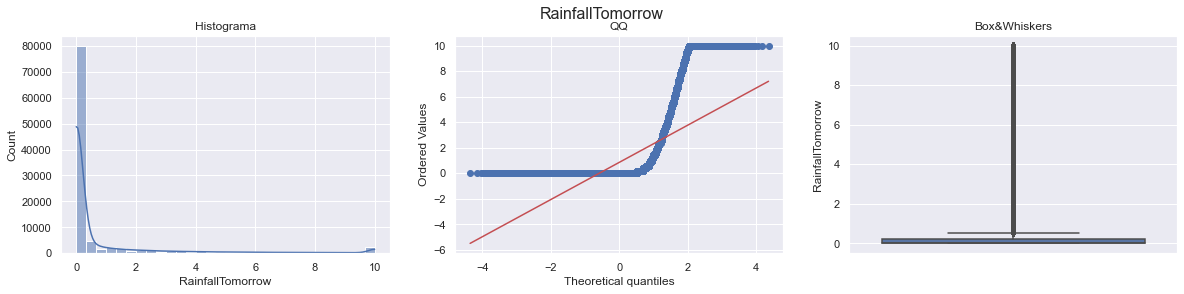

In [32]:
X_train_trimmed = transform_outliers(X_train, norm_rainfall,use_manual_limits=True, 
                        upper_limit_trim=15, lower_limit_trim=0, upper_limit_cap=10, lower_limit_cap=0)
for col in norm_rainfall:
    outlier_diagnostic_plots(X_train_trimmed, col)
    
X_train = X_train_trimmed

# Scaled

In [33]:
scaled_columns = [
    'Rainfall', 
    'WindGustSpeed',
    'WindSpeed9am', 
    'WindSpeed3pm', 
    'Humidity9am',
    'Humidity3pm', 
    'RainfallYesterday',
    'RainfallTomorrow',
    'PressureMean', 
    'TempDiff', 
    'TempMean', 
    'TempMaxDiff'
]

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[scaled_columns] = scaler.fit_transform(X_train[scaled_columns])

# Imputation

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallTomorrow,RainfallYesterday,PressureMean,TempDiff,TempMean,TempMaxDiff
0,Adelaide,56,18,18,205,13,4,5,5,5,56,0,73,2,9,0,3
1,Albany,14,2216,2216,189,563,43,524,33,513,14,0,13,17,513,23,66
2,Albury,15,5,5,423,30,4,3,2,1,15,0,16,0,3,0,5
3,AliceSprings,4,39,39,202,3,2,1,2,2,4,0,6,0,1,0,1
4,BadgerysCreek,40,14,14,303,44,16,16,19,22,40,0,52,97,24,3,10
5,Ballarat,6,20,20,75,11,7,3,16,5,6,0,11,16,11,2,1
6,Bendigo,3,29,28,199,34,2,2,3,1,3,0,6,6,1,0,2
7,Brisbane,25,9,9,48,16,0,0,2,6,25,0,30,0,7,1,10
8,Cairns,17,11,10,22,2,0,1,0,0,17,0,21,0,0,0,0
9,Canberra,11,262,261,418,182,179,177,47,12,11,0,15,168,19,0,5


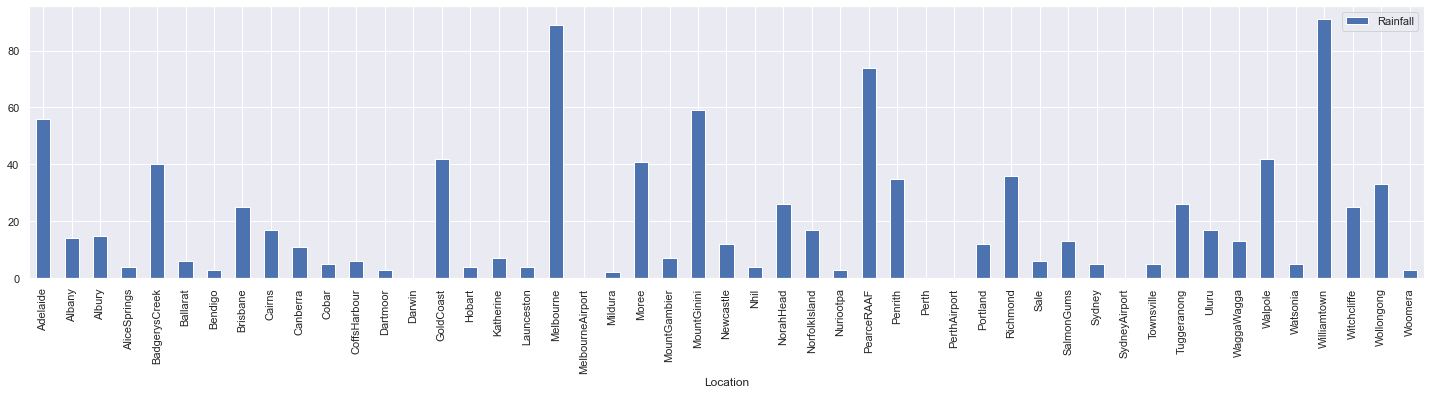

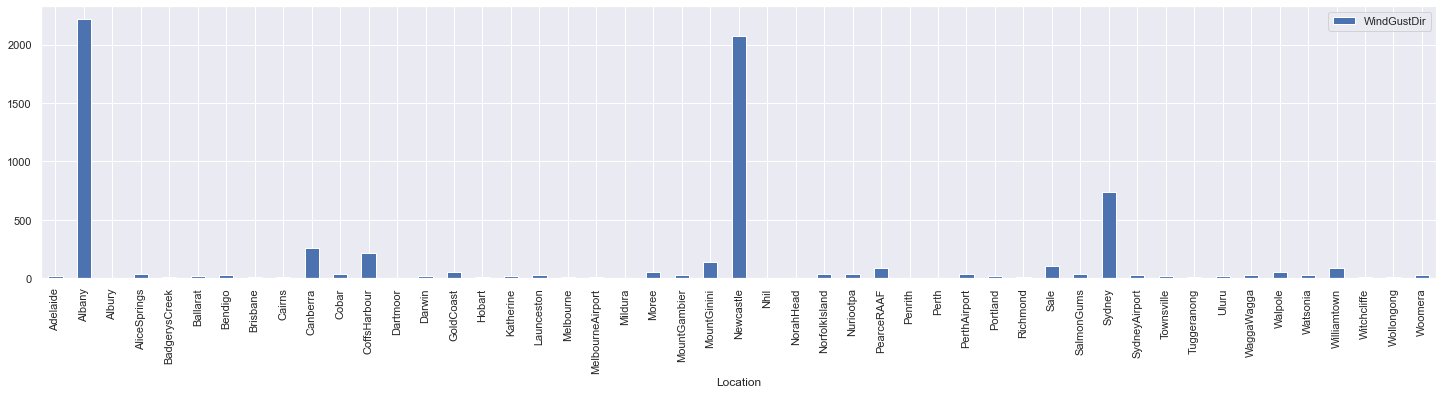

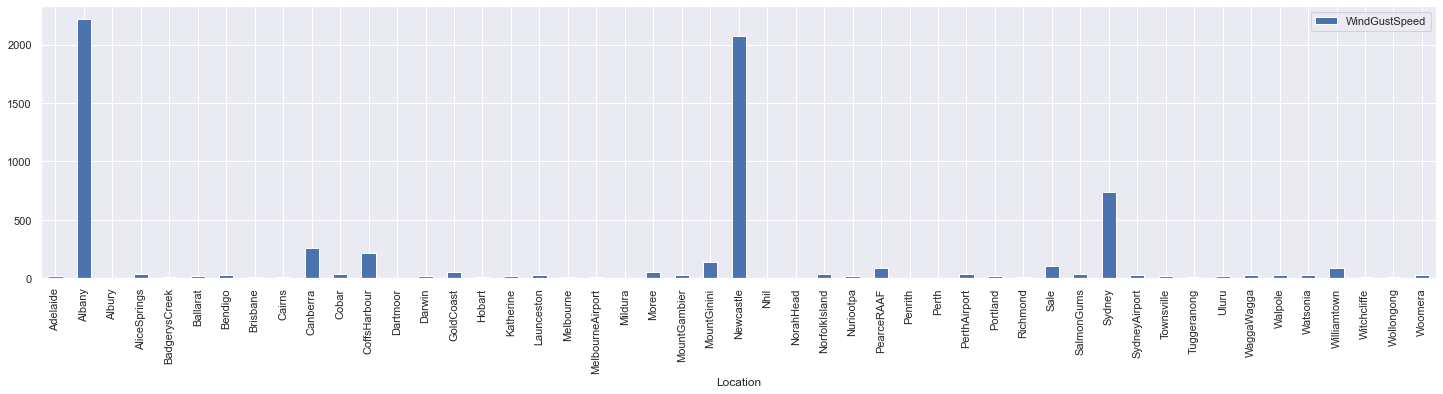

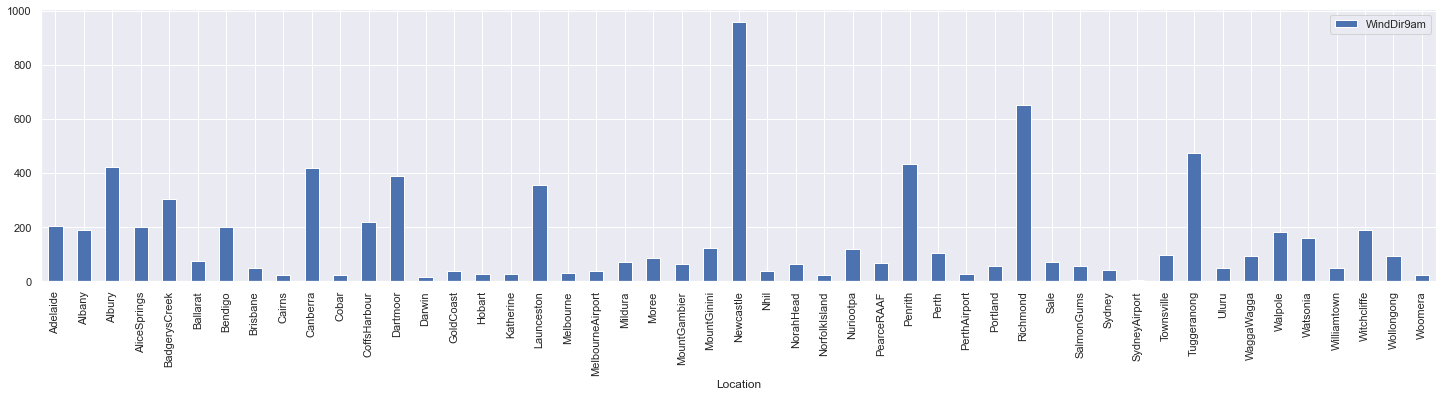

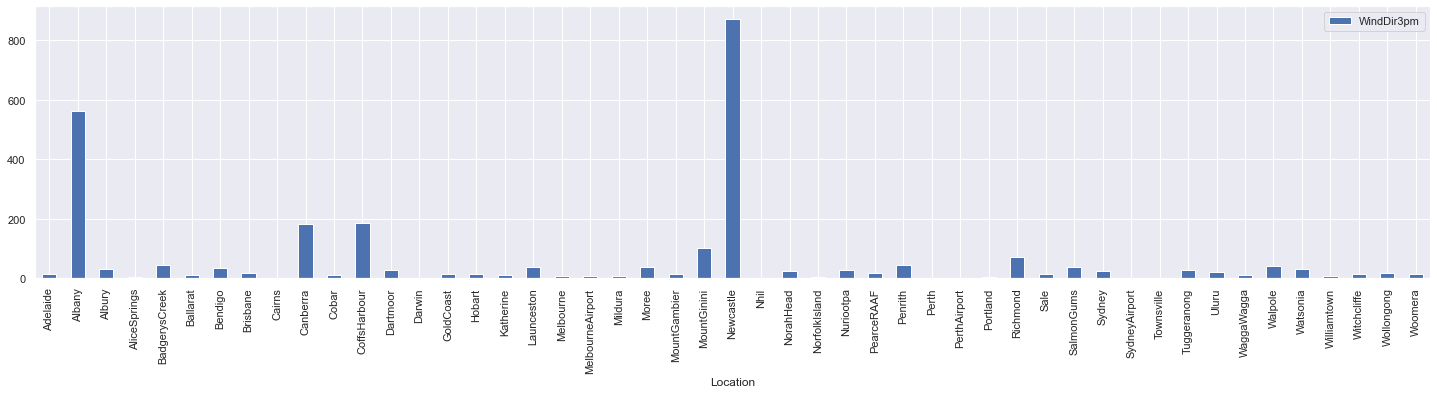

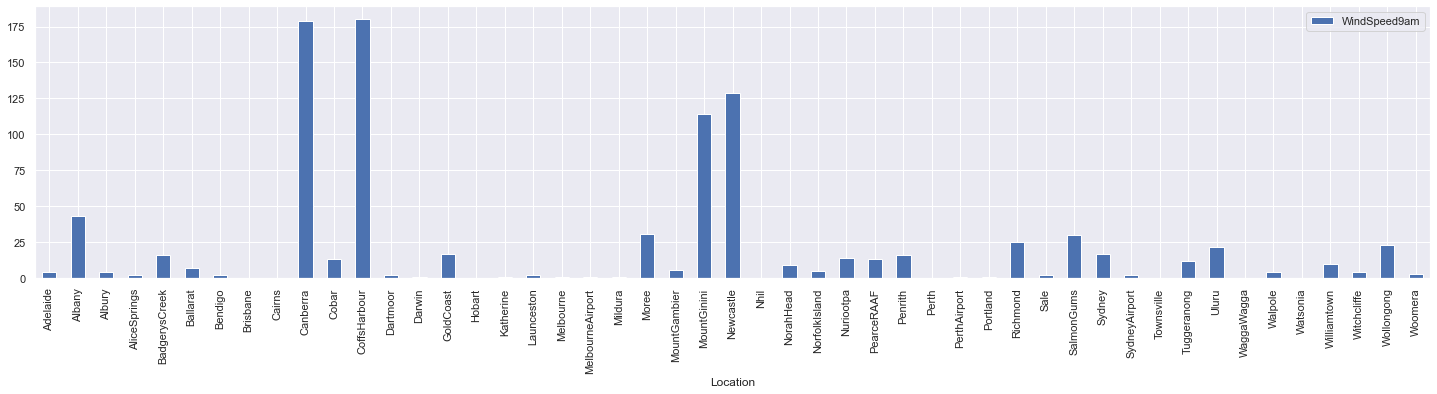

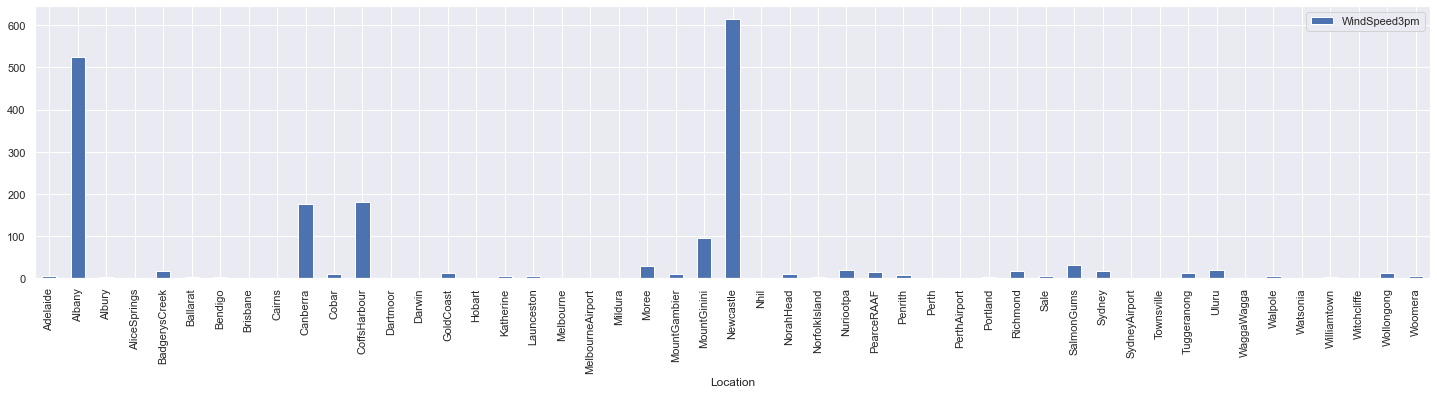

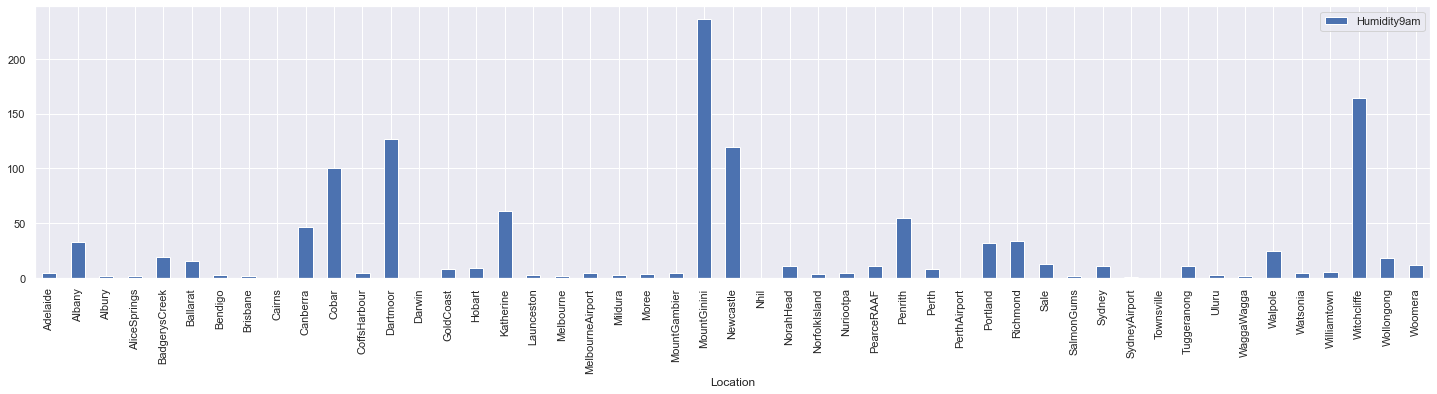

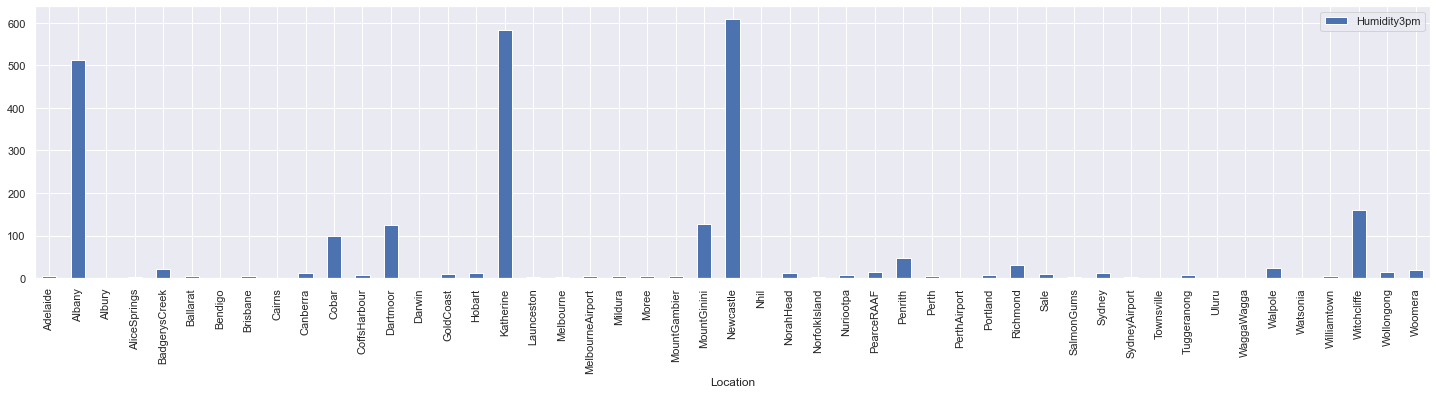

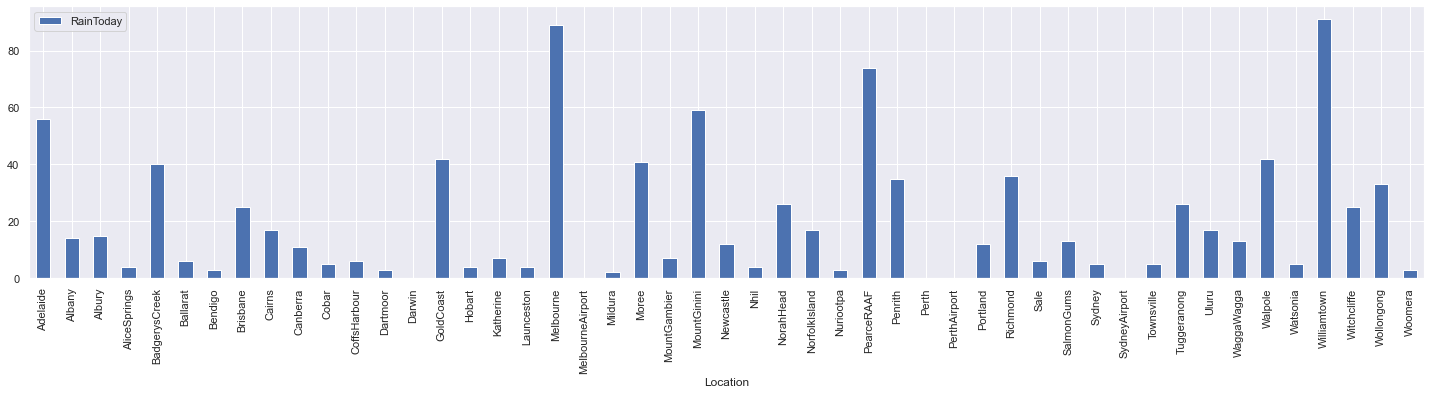

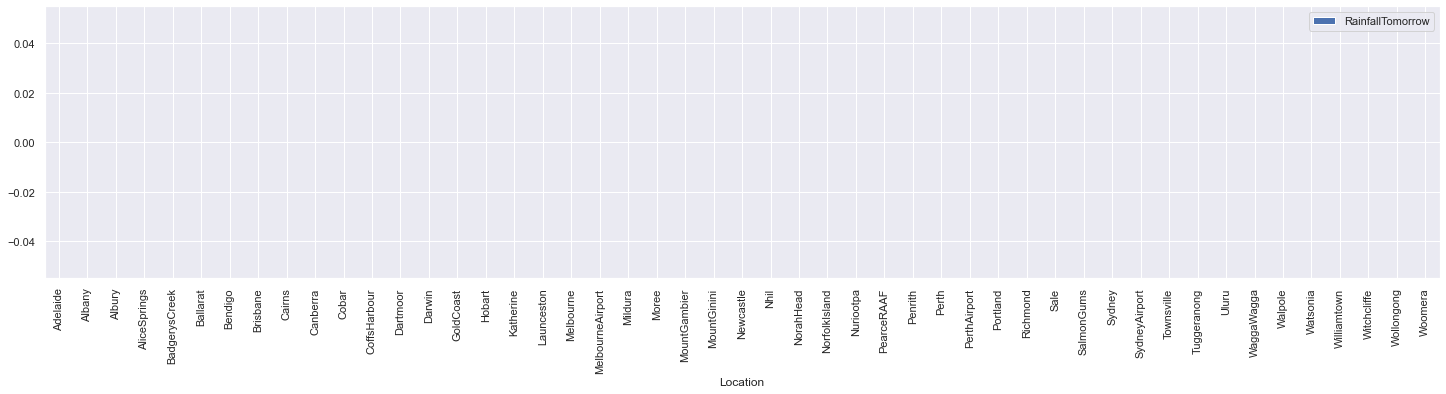

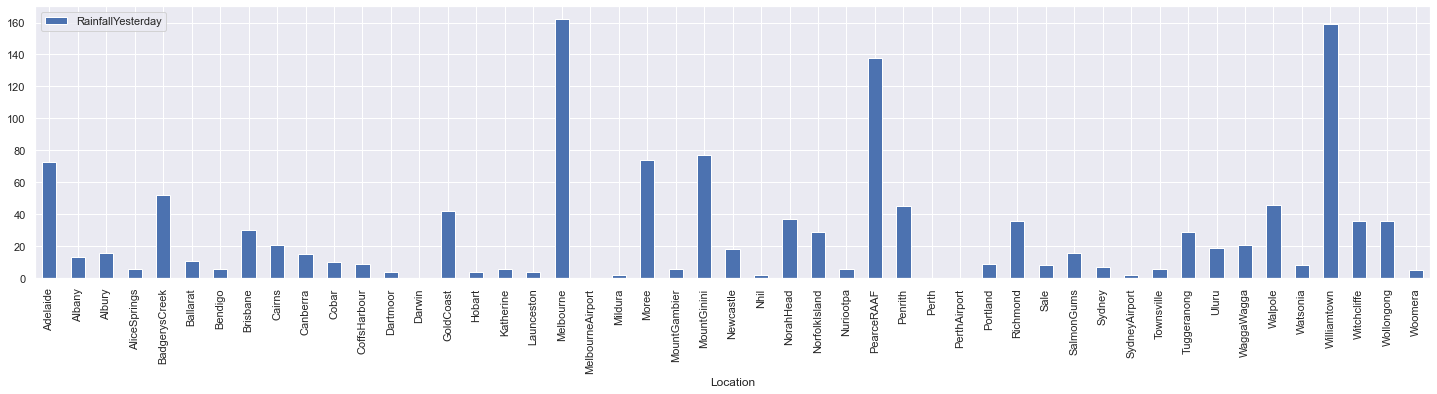

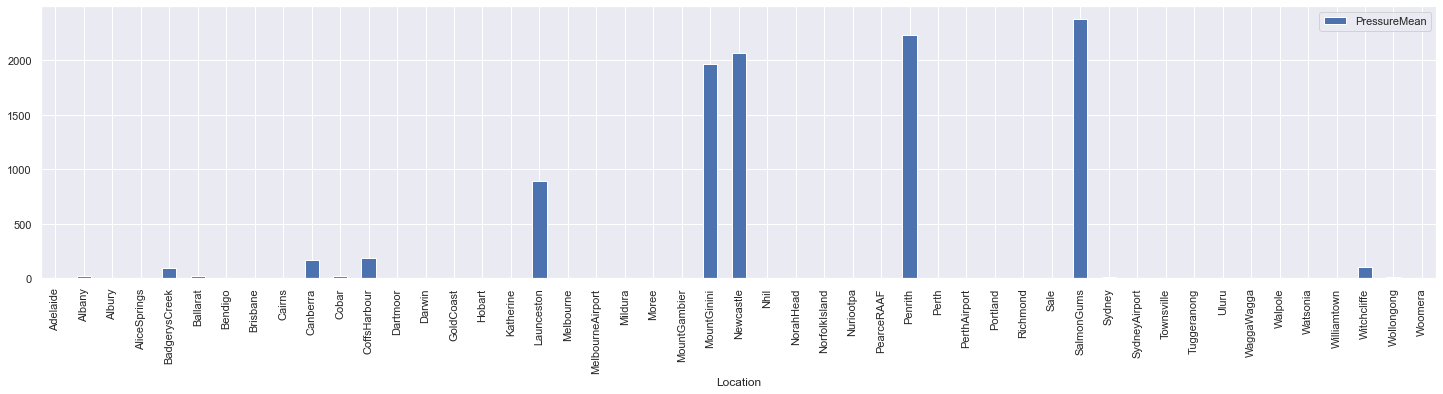

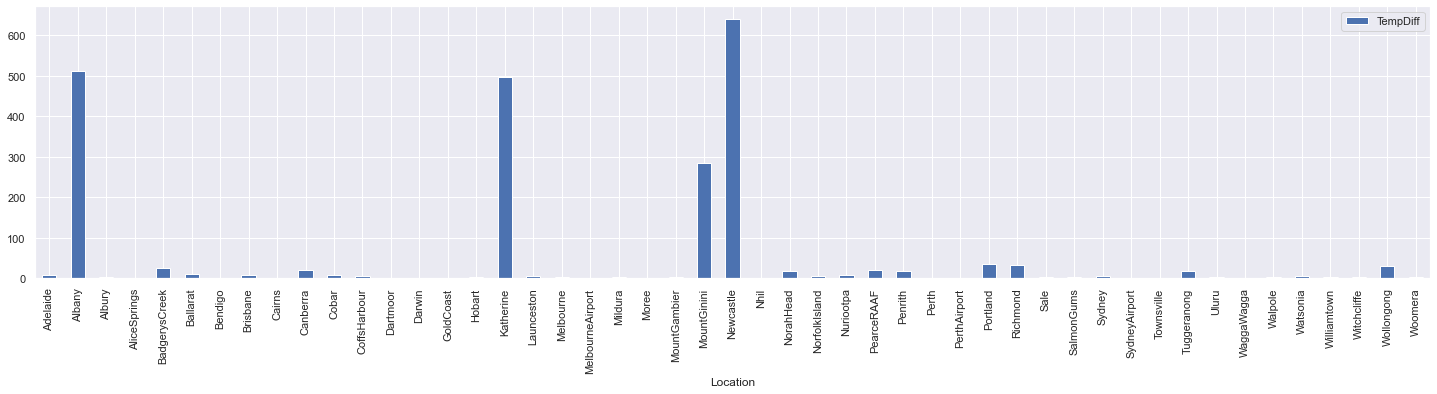

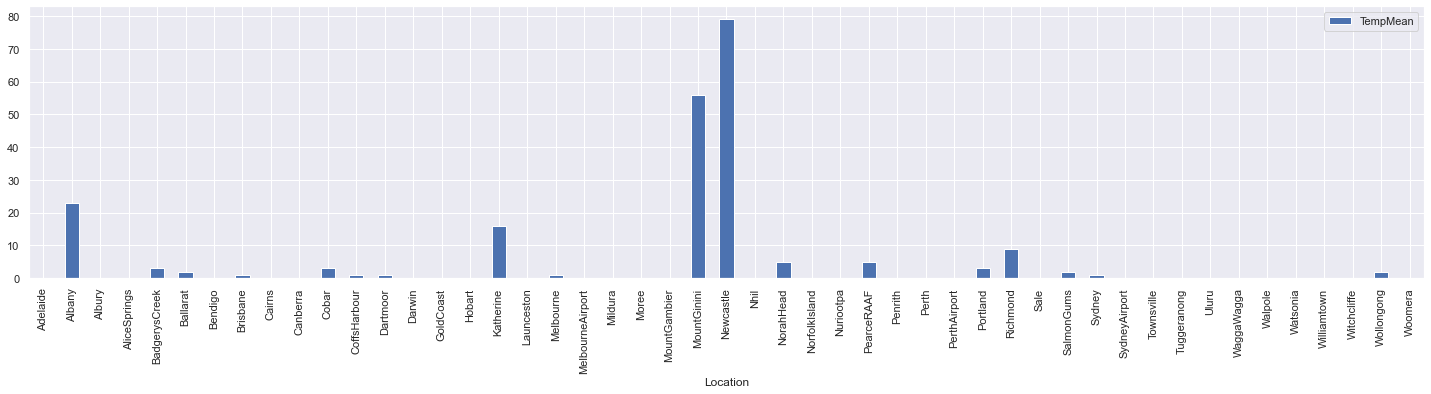

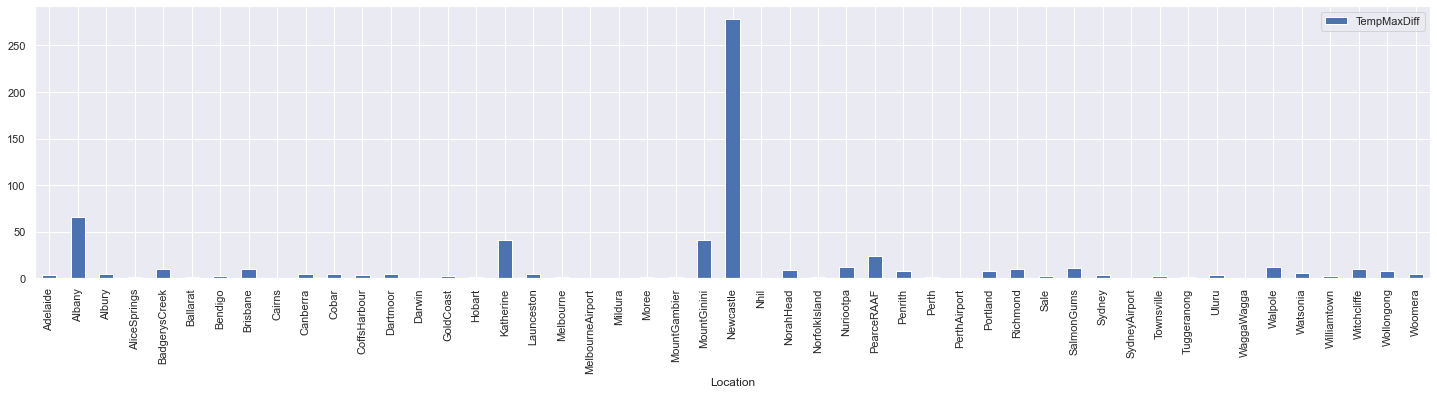

In [35]:
pd.set_option("display.max_columns", None)
%matplotlib inline

drop_df_nan = drop_columns+['RainTomorrow']+[col for col in X_train if col.startswith('LocationType_')]
df_nan_location = X_train.drop(drop_df_nan,axis=1).isnull().groupby(X_train['Location']).sum().astype(int)
df_nan_location.reset_index('Location',inplace=True)

for col in list(df_nan_location.drop(['Location'],axis=1).columns.values):
    df_nan_location.plot.bar(x='Location', y=col, rot=90, figsize=(25,5))
    
df_nan_location

In [36]:
drop_df_nan = drop_columns+['RainTomorrow']+[col for col in X_train if col.startswith('LocationType_')]
df_nan_clusters = X_train.drop(drop_df_nan,axis=1).groupby(X_train['LocationType']).sum().astype(int)
df_nan_clusters.reset_index('LocationType',inplace=True)
df_nan_clusters

,LocationType,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallTomorrow,RainfallYesterday,PressureMean,TempDiff,TempMean,TempMaxDiff
0,0,-413,44808,-1005,55475,38312,-710,1902,220,1250,904,-425,-363,-1931,-2306,5002,-1143
1,1,-691,230725,-2862,243942,249408,-4911,-3919,-186,1728,5607,-356,-612,1327,-2353,499,-1782
2,2,734,104689,691,96809,131819,1209,-190,-2078,-152,2834,755,785,770,-2185,1454,1610
3,3,-1230,48714,511,51651,52979,1153,290,-5782,-5255,569,-1233,-1205,-3759,2408,7594,3522
4,4,335,15980,442,17239,18547,1644,914,137,1820,537,339,324,181,-2717,261,-2858
5,5,1265,306643,2223,257951,307302,1615,1002,7688,609,7134,921,1071,3412,7153,-14813,651


,LocationType,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallTomorrow,RainfallYesterday,PressureMean,TempDiff,TempMean,TempMaxDiff
0,0,58,39,38,770,73,25,18,34,31,58,0,63,5,33,9,12
1,1,470,3752,3751,3461,1625,768,1200,656,995,470,0,663,6758,1080,151,385
2,2,168,2437,2413,811,676,95,576,243,722,168,0,249,2500,542,30,124
3,3,28,101,100,290,38,26,25,66,586,28,0,31,0,502,16,45
4,4,17,33,32,24,4,5,2,4,2,17,0,29,0,6,0,1
5,5,222,380,367,2341,294,50,60,247,215,222,0,326,930,93,7,54


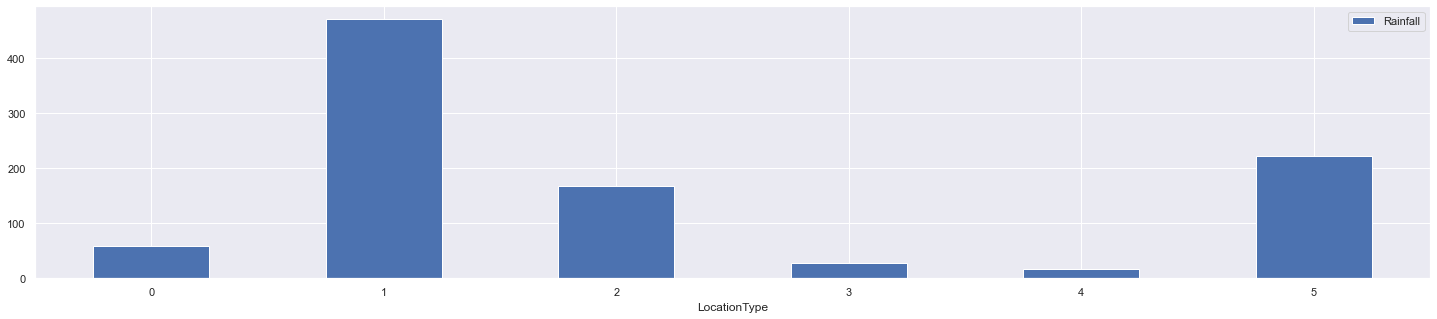

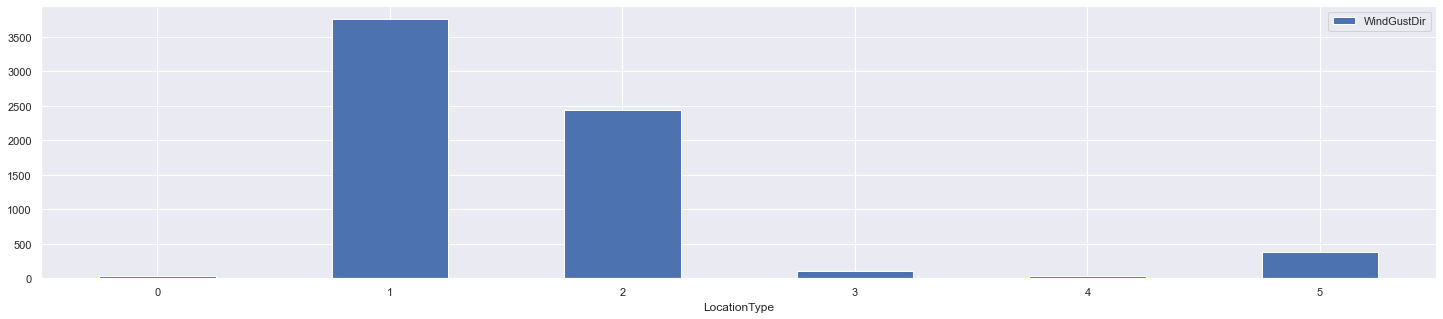

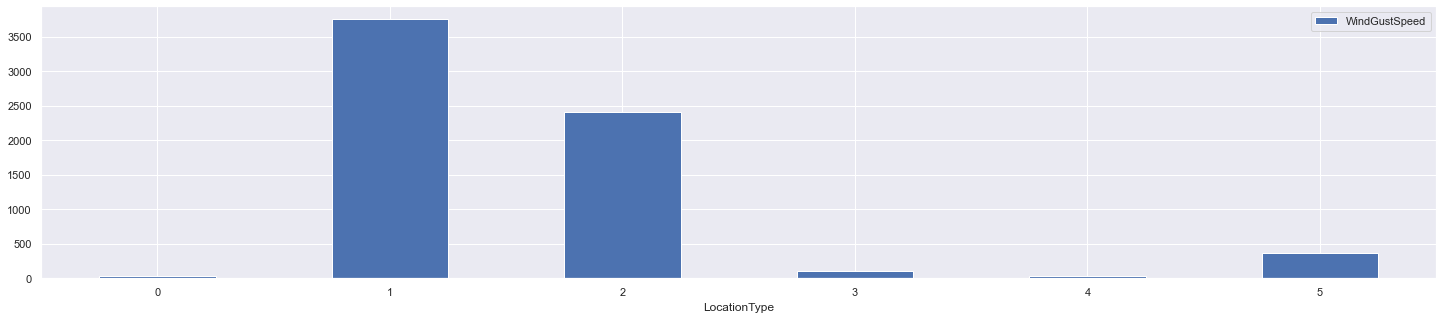

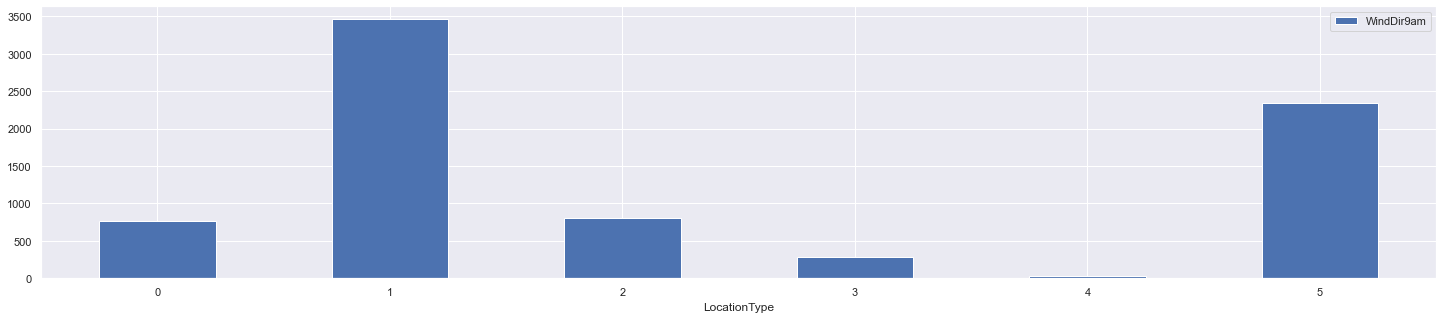

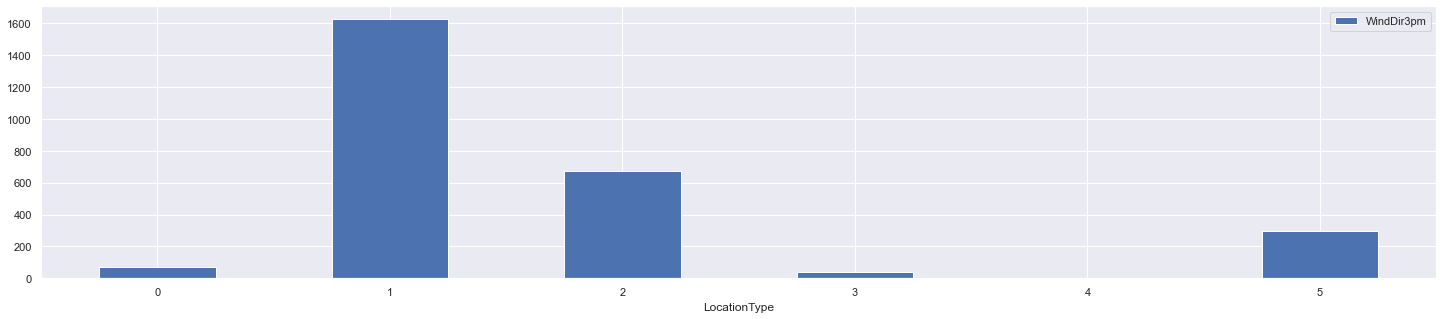

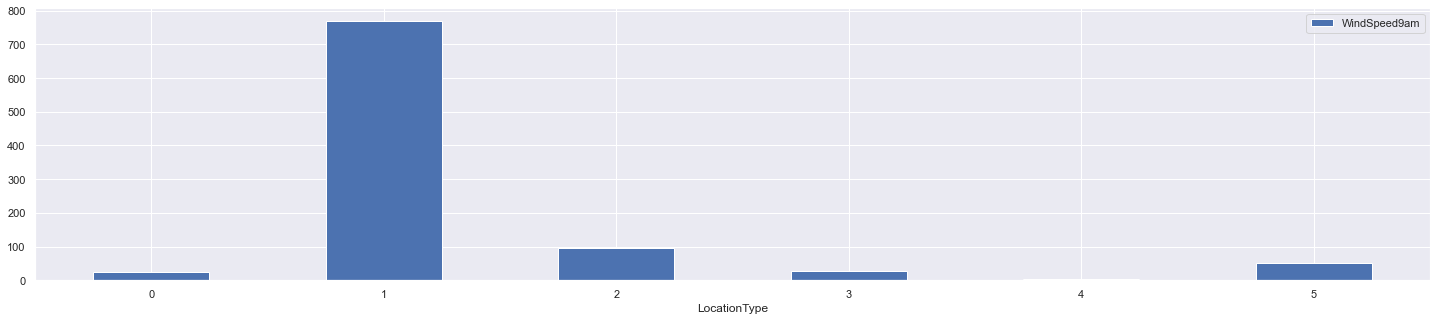

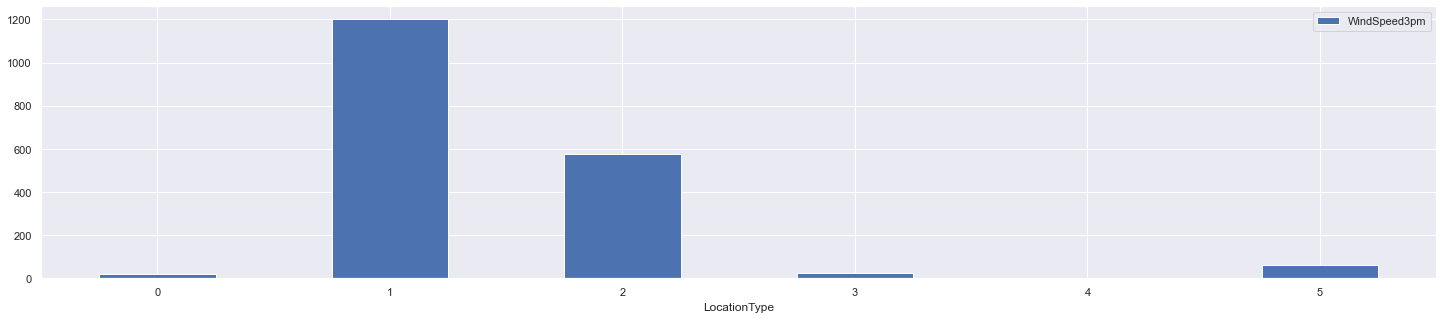

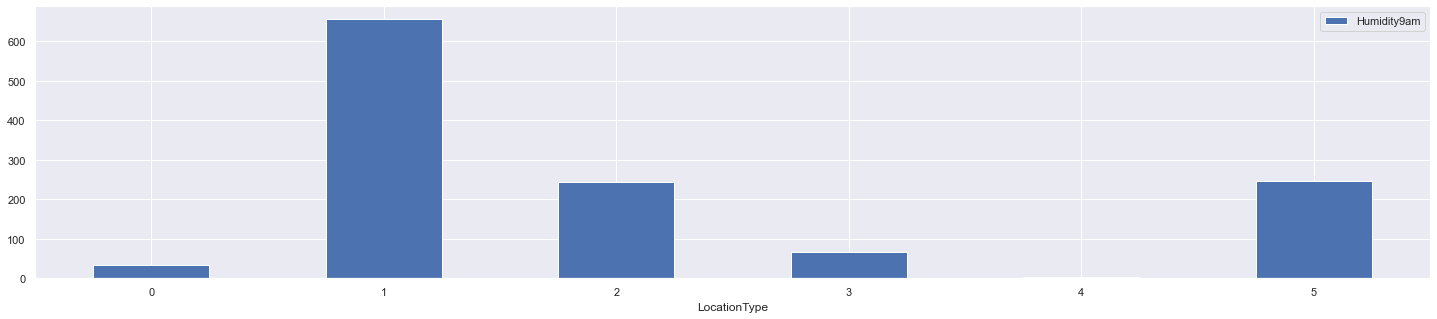

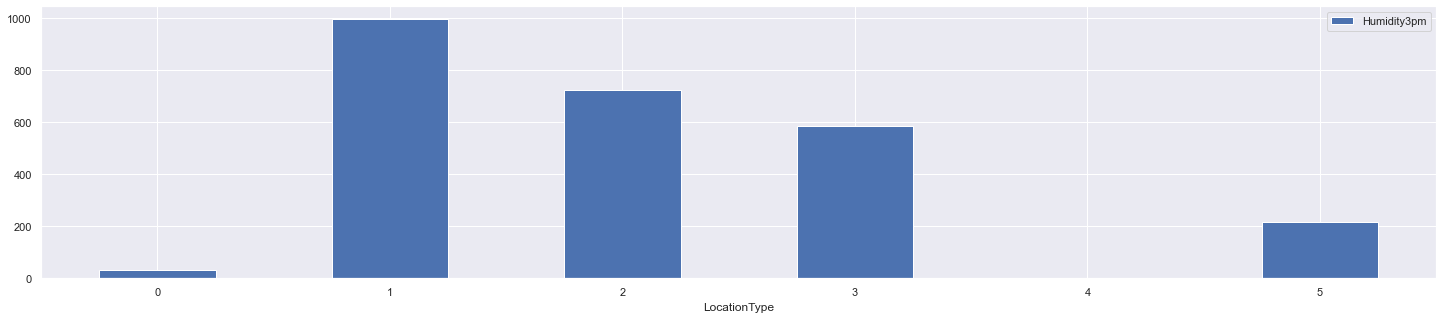

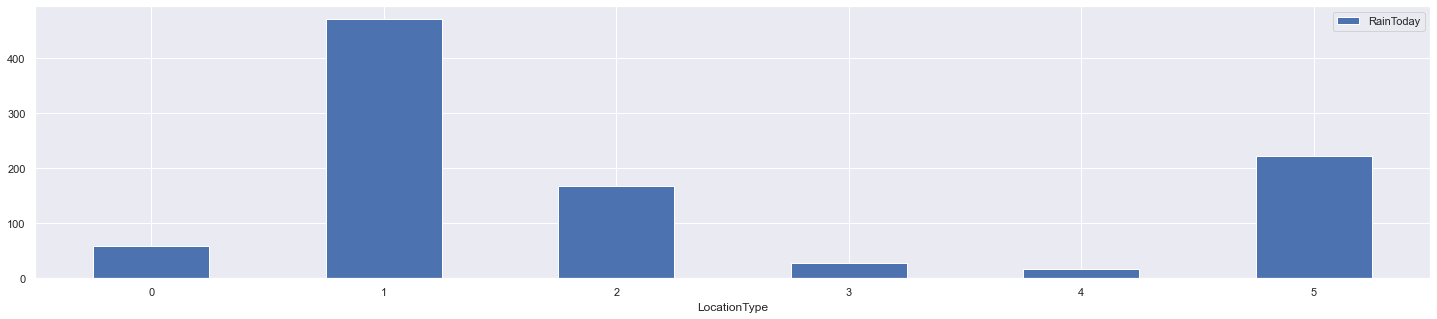

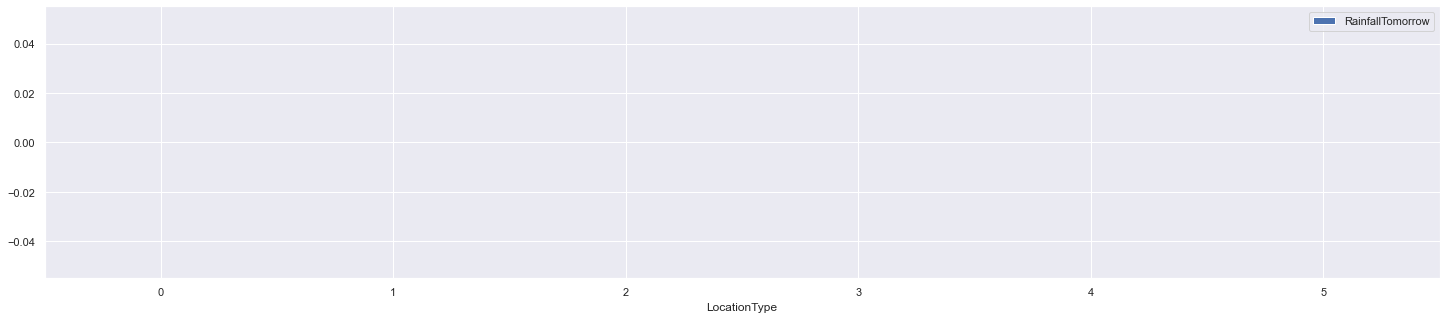

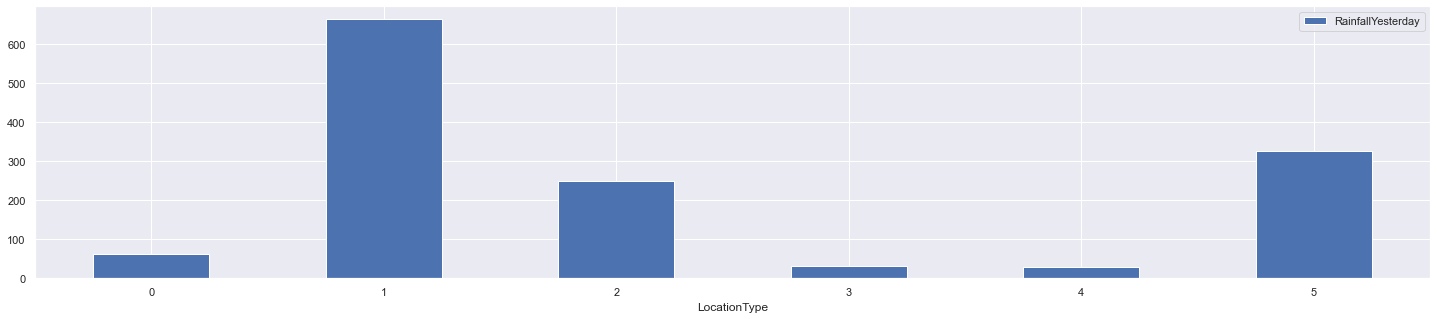

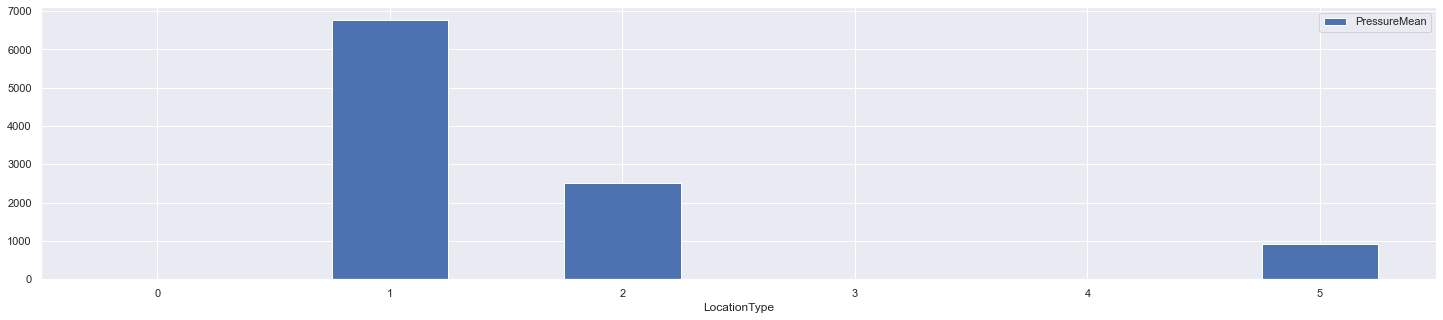

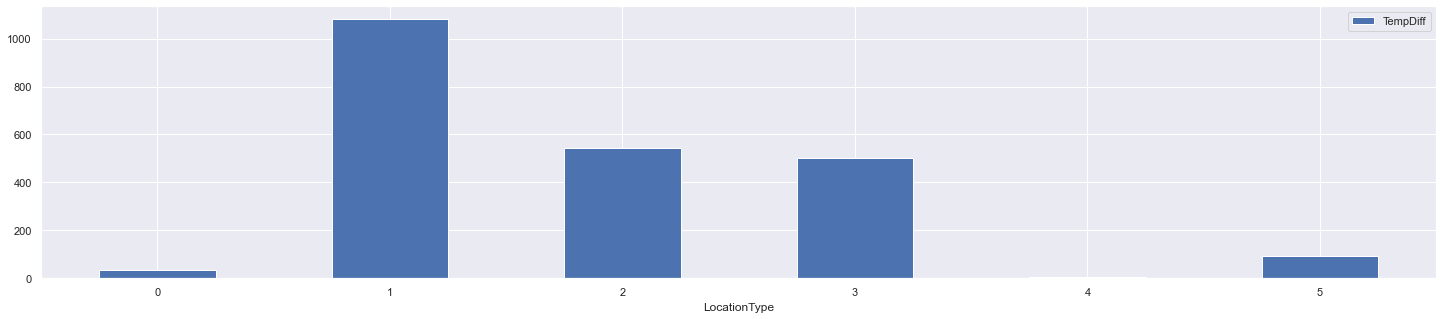

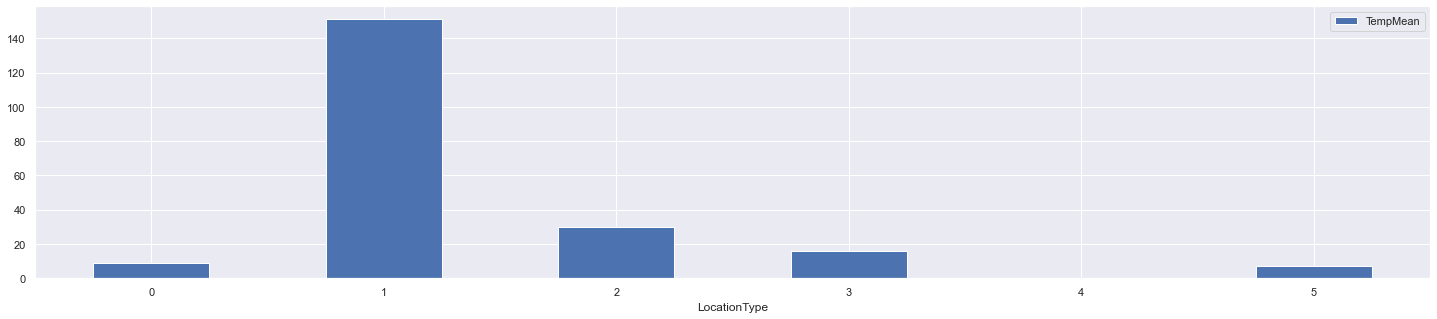

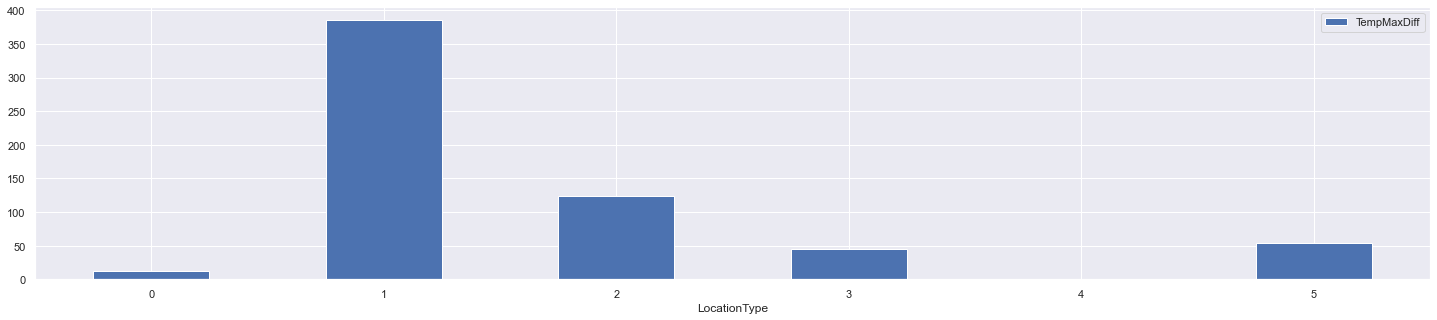

In [37]:
pd.set_option("display.max_columns", None)
%matplotlib inline

drop_df_nan = drop_columns+['RainTomorrow']+[col for col in X_train if col.startswith('LocationType_')]
df_nan_clusters = X_train.drop(drop_df_nan,axis=1).isnull().groupby(X_train['LocationType']).sum().astype(int)
df_nan_clusters.reset_index('LocationType',inplace=True)

for col in list(df_nan_clusters.drop(['LocationType'],axis=1).columns.values):
    df_nan_clusters.plot.bar(x='LocationType', y=col, rot=0, figsize=(25,5))
    
df_nan_clusters

In [38]:
# The column with %NaN <= 5% will be imputed with a simple imputer (using mean).
# The column with %NaN > 5% will be imputed using KNN algorithm.
print("Percentage of NaN for each column:\nColumns with %NaN <= 5%:\n")
print(((1-X_train.count()/X_train.count().max())*100)[((1-X_train.count()/X_train.count().max())*100)<5])
print("\nColumns with %NaN > 5%:\n")
print(((1-X_train.count()/X_train.count().max())*100)[((1-X_train.count()/X_train.count().max())*100)>5])


Percentage of NaN for each column:
Columns with %NaN <= 5%:

Location             0.000000
Rainfall             0.914408
WindDir3pm           2.573257
WindSpeed9am         0.920106
WindSpeed3pm         1.786087
Humidity9am          1.186927
Humidity3pm          2.422280
RainToday            0.914408
RainfallTomorrow     0.000000
RainfallYesterday    1.292326
RainTomorrow         0.000000
LocationType         0.000000
LocationType_0       0.000000
LocationType_1       0.000000
LocationType_2       0.000000
LocationType_3       0.000000
LocationType_4       0.000000
TempDiff             2.142165
TempMean             0.202252
TempMaxDiff          0.589665
dtype: float64

Columns with %NaN > 5%:

WindGustDir      6.401808
WindGustSpeed    6.362877
WindDir9am       7.308620
PressureMean     9.678675
dtype: float64


## Simple mean imputation

In [39]:
from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper

# Consider discrete variables: WindDir3pm -> must be integer
# RainToday -> will be imputed by KNN
imputed_by_mean_col = [
    'Rainfall',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Humidity9am',
    'Humidity3pm',
    'RainfallYesterday',
    'RainfallTomorrow',
    'TempDiff',
    'TempMean',
    'TempMaxDiff',
    'WindDir3pm'
]

In [40]:
X_train_imputed = X_train.copy()
X_train_imputed['imputed_mean'] = 0

imputer = SimpleImputer(strategy='mean',add_indicator=True)

for k in np.sort(pd.unique(X_train['LocationType'])):
    
    print("Running for cluster: "+str(k))

    indx=X_train.loc[X_train['LocationType'] == k][imputed_by_mean_col].copy().index # Get index
    mapper = DataFrameMapper([(imputed_by_mean_col, imputer)])
    
    # X_train.loc[X_train['LocationType'] == k][imputed_by_mean_col]
    transform_features = mapper.fit_transform(X_train.loc[X_train['LocationType'] == k][imputed_by_mean_col].copy(), 4) # Round 4 digits
    qty_imputed_cols = np.array(transform_features).shape[1]-len(imputed_by_mean_col) # Number of imputed columns
    imputed_by_mean_imp_col = [str(d) + "_imputed" for d in range(qty_imputed_cols)] # Name of indicators of imputation
    transform_features_df = pd.DataFrame(transform_features, index=indx, columns=imputed_by_mean_col+imputed_by_mean_imp_col)

    # Add column of imputed indicator. Only one column as an "or" logical operation of all indicators.
    transform_features_df['imputed_mean'] = (transform_features_df[imputed_by_mean_imp_col].sum(axis=1)>0).astype(int)

    X_train_imputed.loc[indx,imputed_by_mean_col+['imputed_mean']]=transform_features_df[imputed_by_mean_col+['imputed_mean']] # Replace in original dataset

    # Check data
    assert(not np.any(X_train_imputed[X_train_imputed.LocationType==k][imputed_by_mean_col].isna().sum()>0))

# Round discrete columns    
X_train_imputed.WindDir3pm = X_train_imputed.WindDir3pm.round()

X_train_imputed.head()

Running for cluster: 0
Running for cluster: 1
Running for cluster: 2
Running for cluster: 3
Running for cluster: 4
Running for cluster: 5


,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallTomorrow,RainfallYesterday,RainTomorrow,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4,PressureMean,TempDiff,TempMean,TempMaxDiff,imputed_mean
118862,PerthAirport,1.022964,8.0,-1.214134,4.0,6.0,-0.535852,-0.626326,1.182221,0.224875,1.0,-0.400601,0.229639,0,2,0.0,0.0,1.0,0.0,0.0,1.186339,0.158540,-0.346945,-0.716398,0
110872,Albany,-0.303472,NaN,NaN,0.0,1.0,2.035012,0.112711,0.273758,1.334104,0.0,1.277346,-0.410773,1,2,0.0,0.0,1.0,0.0,0.0,-0.158924,-1.021928,-0.790049,-1.626227,0
52439,MountGinini,-0.398217,8.0,0.042937,9.0,10.0,0.443525,0.112711,-1.062219,-0.985192,0.0,-0.400601,-0.017026,0,1,0.0,1.0,0.0,0.0,0.0,NaN,0.849546,-0.378040,0.793092,1
101685,MountGambier,-0.398217,14.0,0.042937,14.0,11.0,0.810791,0.235883,-0.634706,-0.430578,0.0,-0.400601,-0.410773,0,5,0.0,0.0,0.0,0.0,0.0,1.148970,0.360083,0.096160,0.834448,0
62689,Sale,-0.208727,8.0,2.808495,8.0,8.0,2.035012,2.760924,-0.314072,1.031587,0.0,-0.307381,-0.410773,0,5,0.0,0.0,0.0,0.0,0.0,-1.892818,-1.309848,-0.945524,-1.109279,0


## KNN imputation

In [41]:
# Consider discrete variables: RainToday, WindDir9am, WindGustDir -> must be integer
imputed_by_knn_col = [
    'RainToday',
    'WindGustDir',
    'WindGustSpeed',
    'WindDir9am',
    'PressureMean'
]
neighbors_col =[
    'Rainfall',
    'WindDir3pm',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Humidity9am',
    'Humidity3pm',
    'TempDiff',
    'TempMean',
    'TempMaxDiff'
]

In [42]:
X_train_imputed_knn = X_train_imputed.copy()

from sklearn.impute import KNNImputer
X_train_imputed_knn['imputed_knn'] = 0
neighbors = 5
imputer = KNNImputer(n_neighbors=neighbors,add_indicator=True)

knn_cols = imputed_by_knn_col + neighbors_col

for k in np.sort(pd.unique(X_train['LocationType'])):
    print("Running for cluster: "+str(k))

    indx=X_train.loc[X_train['LocationType'] == k][knn_cols].copy().index # Get index
    mapper = DataFrameMapper([(knn_cols, imputer)])

    # X_train.loc[X_train['LocationType'] == k][knn_cols+['LocationType']]
    transform_features = mapper.fit_transform(X_train.loc[X_train['LocationType'] == k][knn_cols].copy(), 4) # Round 4 digits
    qty_imputed_cols = np.array(transform_features).shape[1]-len(knn_cols) # Number of imputed columns
    imputed_by_knn_imp_col = [str(d) + "_imputed" for d in range(qty_imputed_cols)] # Name of indicators of imputation
    transform_features_df = pd.DataFrame(transform_features, index=indx, columns=knn_cols+imputed_by_knn_imp_col)
    transform_features_df.isna().sum()

    # Add column of imputed indicator. Only one column as an "or" logical operation of all indicators.
    transform_features_df['imputed_knn'] = (transform_features_df[imputed_by_knn_imp_col].sum(axis=1)>0).astype(int)

    X_train_imputed_knn.loc[indx,imputed_by_knn_col+['imputed_knn']]=transform_features_df[imputed_by_knn_col+['imputed_knn']] # Replace in original dataset

    # Check data
    assert(not np.any(X_train_imputed_knn[X_train_imputed_knn.LocationType==k][imputed_by_knn_col].isna().sum()>0))

# Round discrete columns   
X_train_imputed_knn.RainToday = X_train_imputed_knn.RainToday.round()
X_train_imputed_knn.WindDir9am = X_train_imputed_knn.WindDir9am.round()
X_train_imputed_knn.WindGustDir = X_train_imputed_knn.WindGustDir.round()
X_train_imputed_knn.head()


Running for cluster: 0
Running for cluster: 1
Running for cluster: 2
Running for cluster: 3
Running for cluster: 4
Running for cluster: 5


,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallTomorrow,RainfallYesterday,RainTomorrow,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4,PressureMean,TempDiff,TempMean,TempMaxDiff,imputed_mean,imputed_knn
118862,PerthAirport,1.022964,8.0,-1.214134,4.0,6.0,-0.535852,-0.626326,1.182221,0.224875,1.0,-0.400601,0.229639,0,2,0.0,0.0,1.0,0.0,0.0,1.186339,0.158540,-0.346945,-0.716398,0,0
110872,Albany,-0.303472,8.0,0.495483,0.0,1.0,2.035012,0.112711,0.273758,1.334104,0.0,1.277346,-0.410773,1,2,0.0,0.0,1.0,0.0,0.0,-0.158924,-1.021928,-0.790049,-1.626227,0,1
52439,MountGinini,-0.398217,8.0,0.042937,9.0,10.0,0.443525,0.112711,-1.062219,-0.985192,0.0,-0.400601,-0.017026,0,1,0.0,1.0,0.0,0.0,0.0,0.643749,0.849546,-0.378040,0.793092,1,1
101685,MountGambier,-0.398217,14.0,0.042937,14.0,11.0,0.810791,0.235883,-0.634706,-0.430578,0.0,-0.400601,-0.410773,0,5,0.0,0.0,0.0,0.0,0.0,1.148970,0.360083,0.096160,0.834448,0,0
62689,Sale,-0.208727,8.0,2.808495,8.0,8.0,2.035012,2.760924,-0.314072,1.031587,0.0,-0.307381,-0.410773,0,5,0.0,0.0,0.0,0.0,0.0,-1.892818,-1.309848,-0.945524,-1.109279,0,0


In [43]:
print("Percentage of NaN for each imputed column:\n")
print(((1-X_train_imputed_knn.count()/X_train_imputed_knn.count().max())*100))

Percentage of NaN for each imputed column:

Location             0.0
Rainfall             0.0
WindGustDir          0.0
WindGustSpeed        0.0
WindDir9am           0.0
WindDir3pm           0.0
WindSpeed9am         0.0
WindSpeed3pm         0.0
Humidity9am          0.0
Humidity3pm          0.0
RainToday            0.0
RainfallTomorrow     0.0
RainfallYesterday    0.0
RainTomorrow         0.0
LocationType         0.0
LocationType_0       0.0
LocationType_1       0.0
LocationType_2       0.0
LocationType_3       0.0
LocationType_4       0.0
PressureMean         0.0
TempDiff             0.0
TempMean             0.0
TempMaxDiff          0.0
imputed_mean         0.0
imputed_knn          0.0
dtype: float64


In [44]:
X_train = X_train_imputed_knn

# Cyclic encoding for wind speed

In [45]:
wind_dir_colums = ['WindGustDir','WindDir9am','WindDir3pm']
for wd in wind_dir_colums:
    X_train[wd+'_cos'] = np.cos(2 * np.pi * (X_train[wd]/16))
    X_train[wd+'_sin'] = np.sin(2 * np.pi * (X_train[wd]/16))

# X_train.drop(wind_dir_colums,axis=1, inplace=True)
drop_columns+=wind_dir_colums
X_train.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallTomorrow,RainfallYesterday,RainTomorrow,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4,PressureMean,TempDiff,TempMean,TempMaxDiff,imputed_mean,imputed_knn,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin
118862,PerthAirport,1.022964,8.0,-1.214134,4.0,6.0,-0.535852,-0.626326,1.182221,0.224875,1.0,-0.400601,0.229639,0,2,0.0,0.0,1.0,0.0,0.0,1.186339,0.158540,-0.346945,-0.716398,0,0,-1.000000,1.224647e-16,6.123234e-17,1.000000e+00,-0.707107,7.071068e-01
110872,Albany,-0.303472,8.0,0.495483,0.0,1.0,2.035012,0.112711,0.273758,1.334104,0.0,1.277346,-0.410773,1,2,0.0,0.0,1.0,0.0,0.0,-0.158924,-1.021928,-0.790049,-1.626227,0,1,-1.000000,1.224647e-16,1.000000e+00,0.000000e+00,0.923880,3.826834e-01
52439,MountGinini,-0.398217,8.0,0.042937,9.0,10.0,0.443525,0.112711,-1.062219,-0.985192,0.0,-0.400601,-0.017026,0,1,0.0,1.0,0.0,0.0,0.0,0.643749,0.849546,-0.378040,0.793092,1,1,-1.000000,1.224647e-16,-9.238795e-01,-3.826834e-01,-0.707107,-7.071068e-01
101685,MountGambier,-0.398217,14.0,0.042937,14.0,11.0,0.810791,0.235883,-0.634706,-0.430578,0.0,-0.400601,-0.410773,0,5,0.0,0.0,0.0,0.0,0.0,1.148970,0.360083,0.096160,0.834448,0,0,0.707107,-7.071068e-01,7.071068e-01,-7.071068e-01,-0.382683,-9.238795e-01
62689,Sale,-0.208727,8.0,2.808495,8.0,8.0,2.035012,2.760924,-0.314072,1.031587,0.0,-0.307381,-0.410773,0,5,0.0,0.0,0.0,0.0,0.0,-1.892818,-1.309848,-0.945524,-1.109279,0,0,-1.000000,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000,1.224647e-16


# Normalization

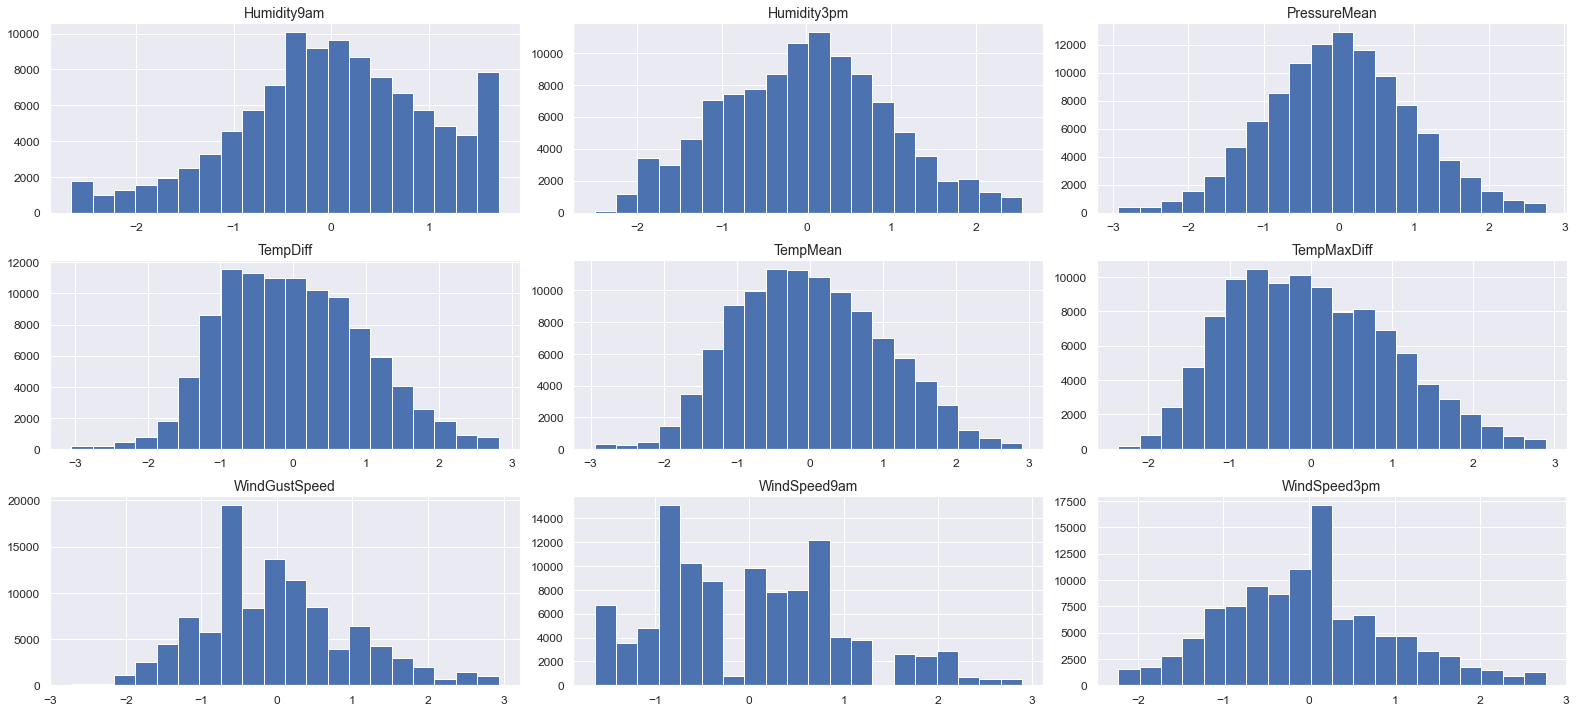

In [46]:
norm_col_yj = [
    'Humidity9am',
    'Humidity3pm',
    'PressureMean',
    'TempDiff',
    'TempMean',
    'TempMaxDiff'
]

norm_col_qt = [
    'WindGustSpeed',
    'WindSpeed9am',
    'WindSpeed3pm',
]

display_dataset_distributions(X_train[norm_col_yj+norm_col_qt],bins=20)

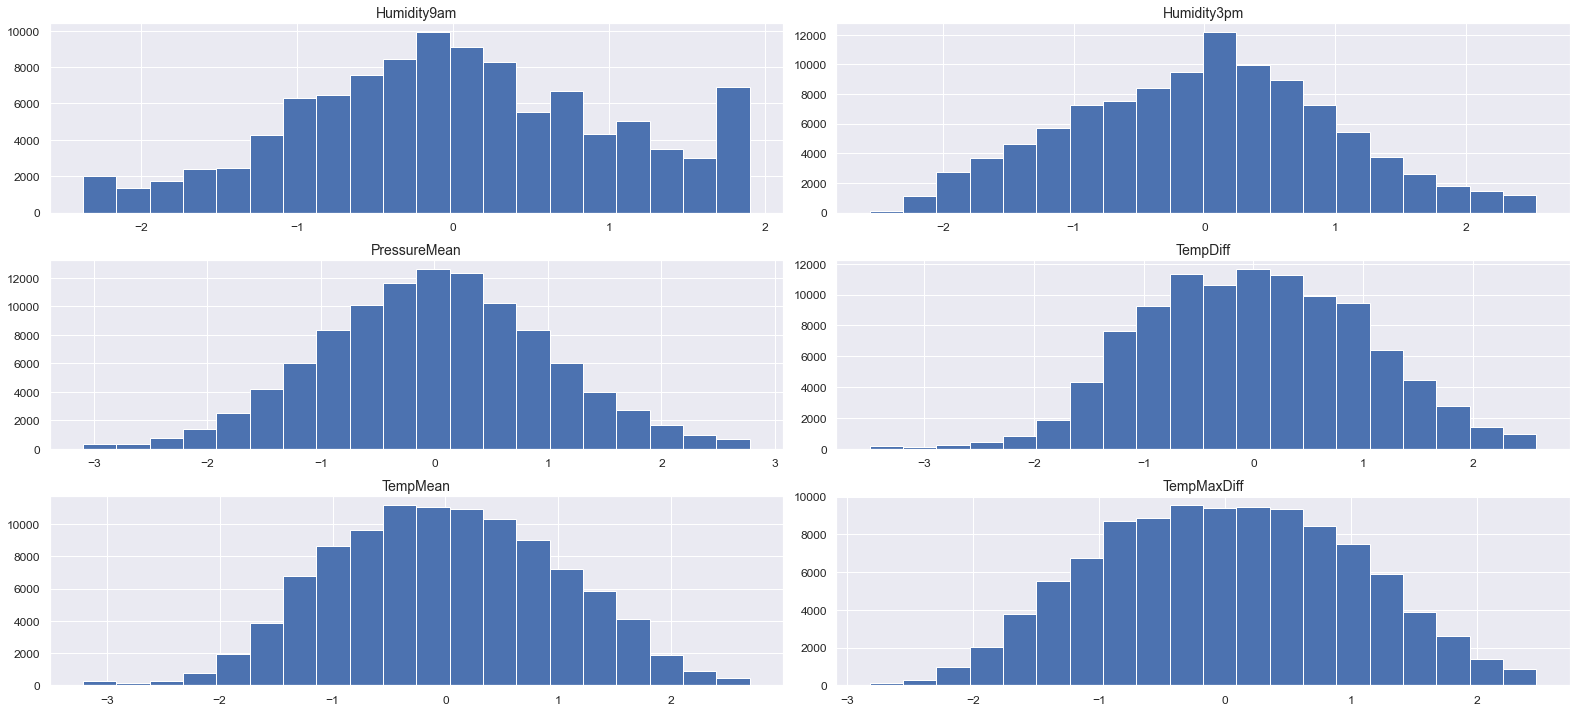

In [47]:
from sklearn.preprocessing import PowerTransformer

X_transformed = X_train.copy()
power = PowerTransformer(method= 'yeo-johnson')
X_transformed[norm_col_yj] = power.fit_transform(X_train[norm_col_yj])
display_dataset_distributions(X_transformed[norm_col_yj],bins=20)

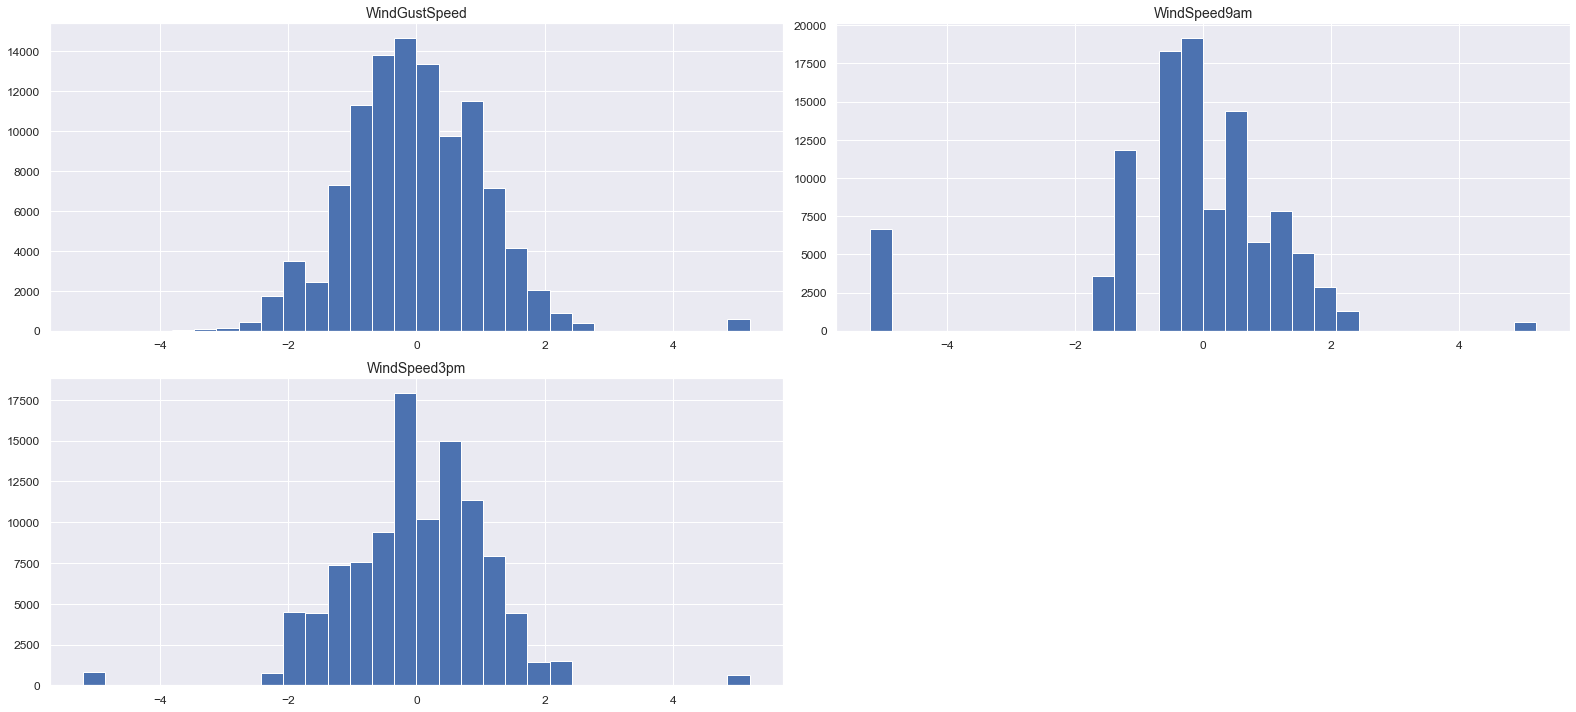

In [48]:
from sklearn.preprocessing import QuantileTransformer

power = QuantileTransformer(output_distribution= 'normal')
X_transformed[norm_col_qt] = power.fit_transform(X_train[norm_col_qt])
display_dataset_distributions(X_transformed[norm_col_qt],bins=30)

# Correlation

In [49]:
drop_for_plot = ['LocationType_0','LocationType_1','LocationType_2','LocationType_3',
                'LocationType_4','LocationType','imputed_mean', 'imputed_knn',
                'WindGustDir_cos', 'WindGustDir_sin', 'WindDir9am_cos',
                'WindDir9am_sin', 'WindDir3pm_cos', 'WindDir3pm_sin']

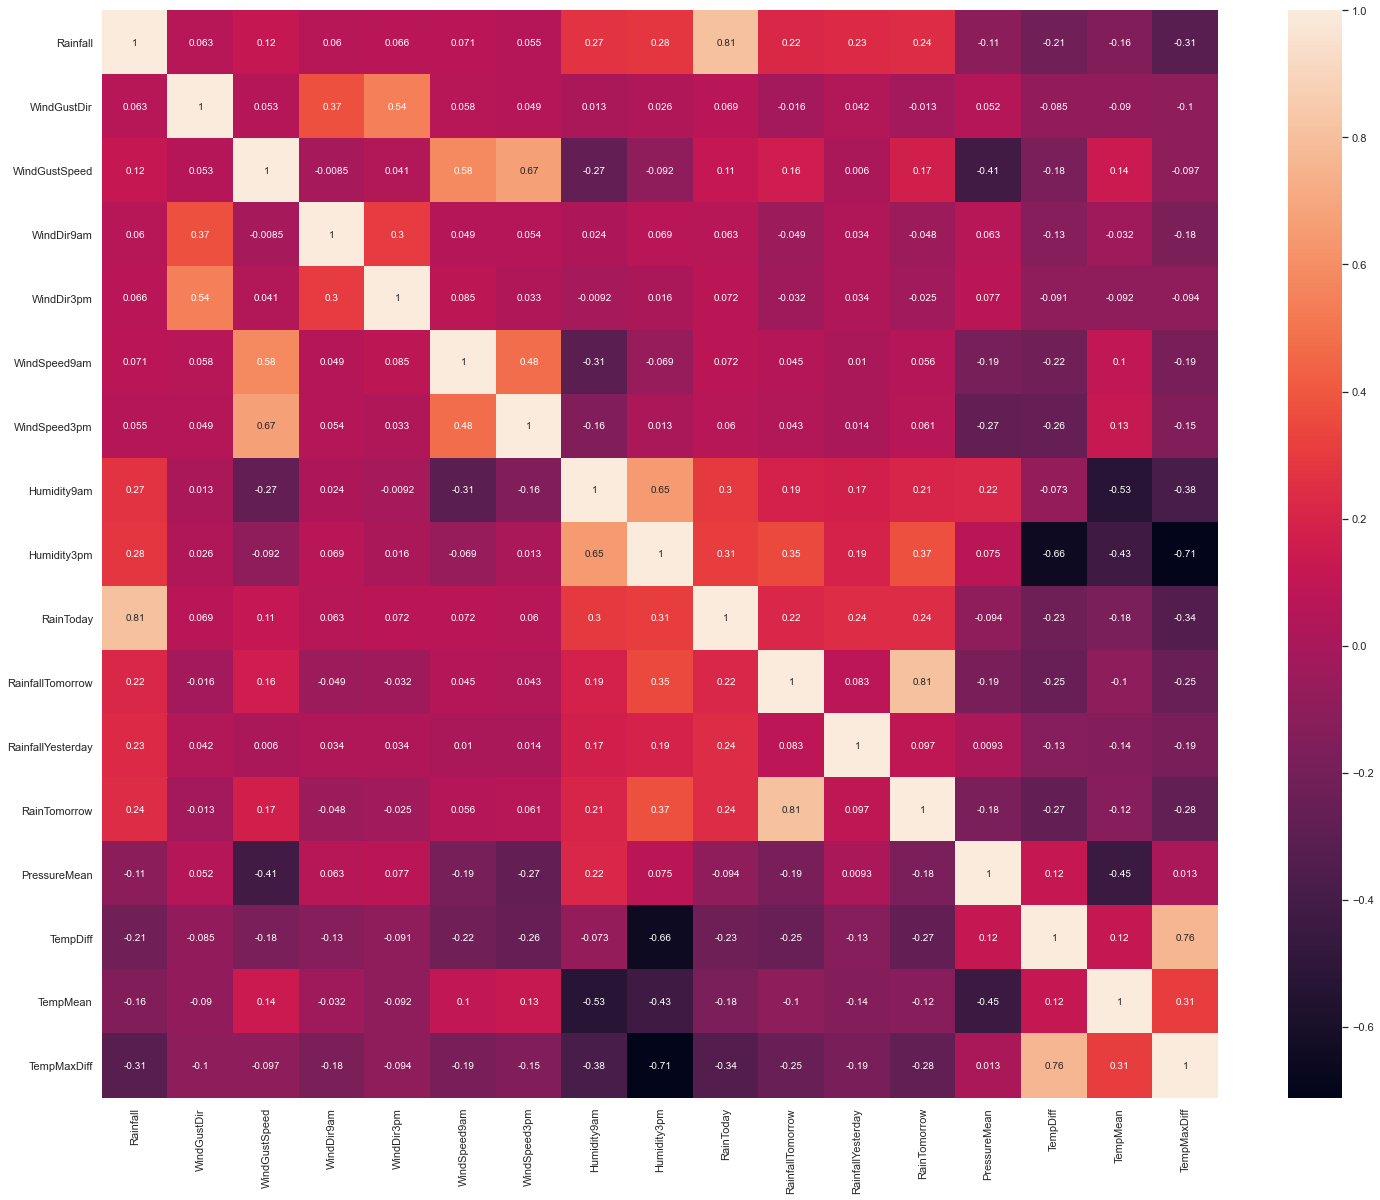

In [50]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(X_train.drop(drop_for_plot,axis=1).corr(), annot=True)

C:\Users\Baffo\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


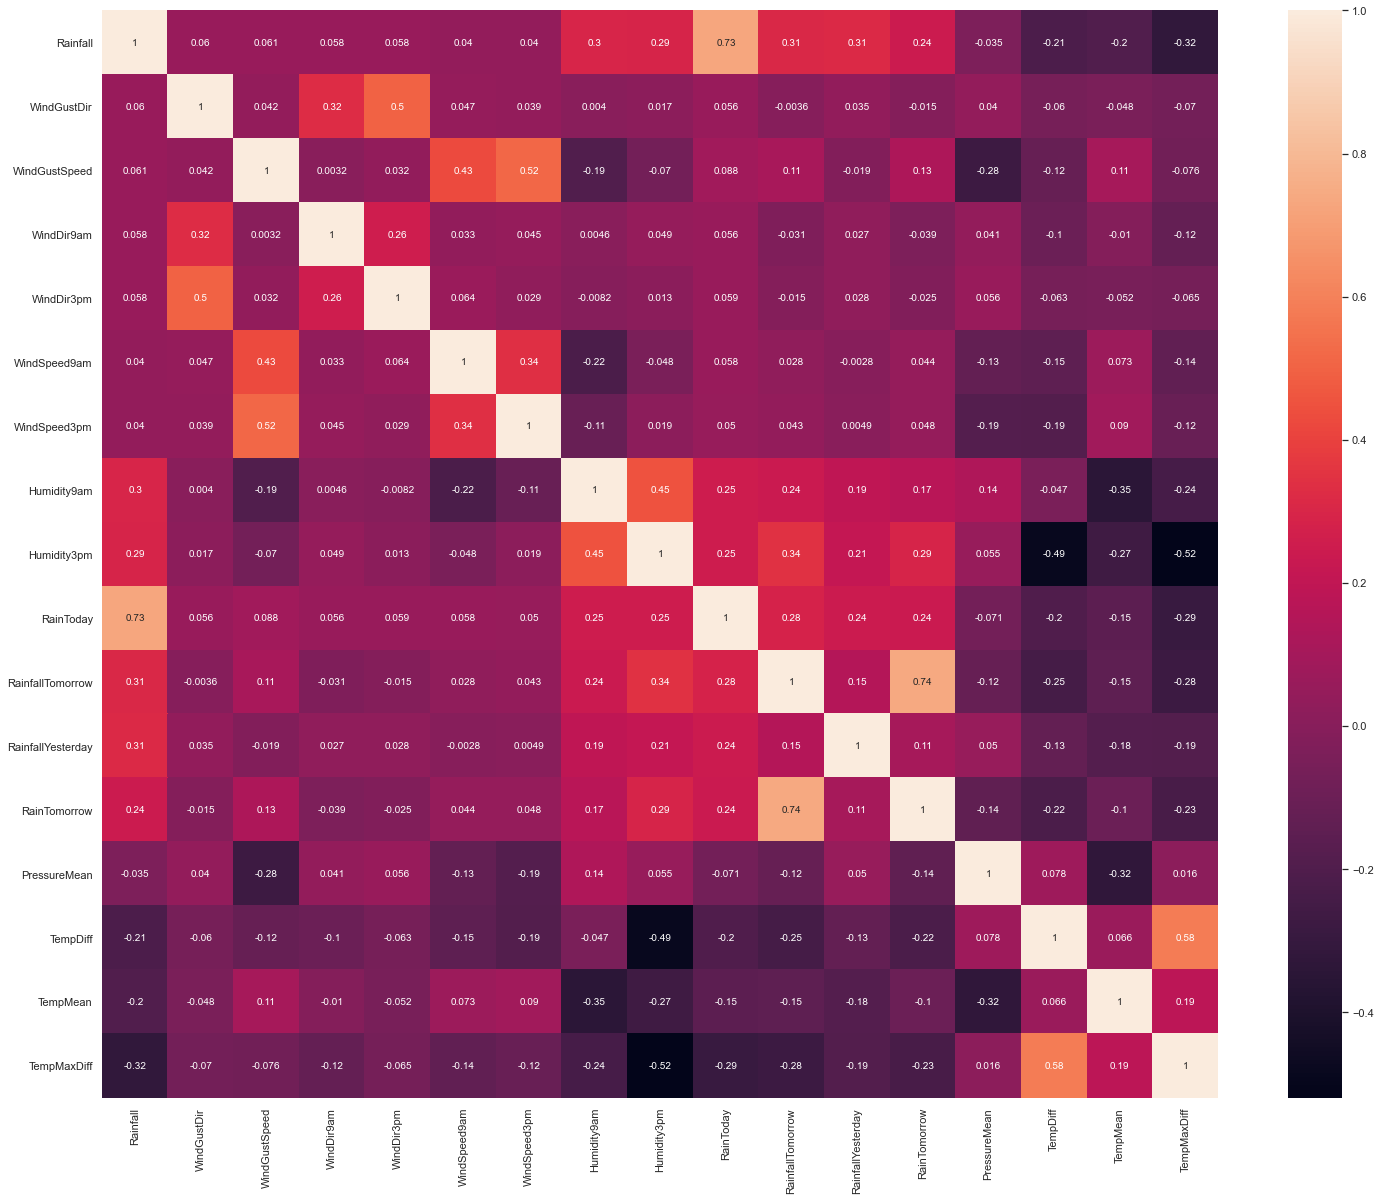

In [51]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(X_train.drop(drop_for_plot,axis=1).corr(method='kendall'),annot=True)

In [52]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

def select_features_mi(X_train, y_train, k='all'):  
  fs = SelectKBest(score_func=mutual_info_classif, k=k )  
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)  
  return X_train_fs, fs

def select_features_continouos(X, y):
  return mutual_info_regression(X, y, discrete_features='auto')


mi_cols = ['Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
  'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
  'Humidity3pm', 'RainToday', 'RainfallYesterday', 'PressureMean',
  'TempDiff', 'TempMean', 'TempMaxDiff']

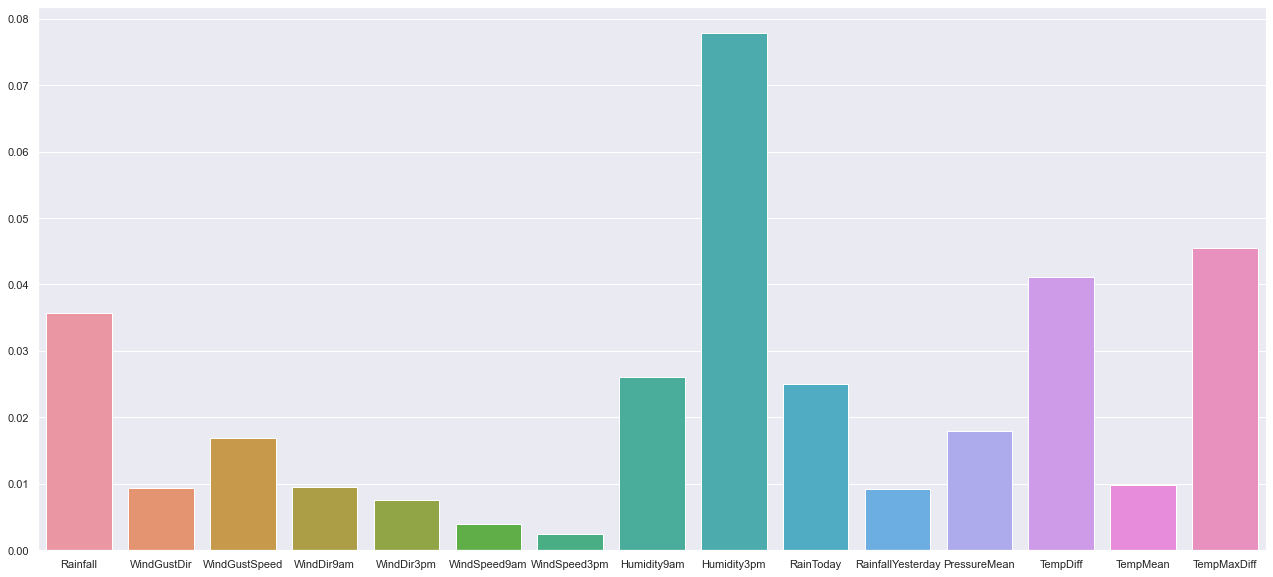

In [53]:
X_train_mi, mi = select_features_mi(X_train[mi_cols], X_train['RainTomorrow'])
plt.figure(figsize=(22,10))
sns.barplot(x=X_train[mi_cols].columns.values,y=mi.scores_);

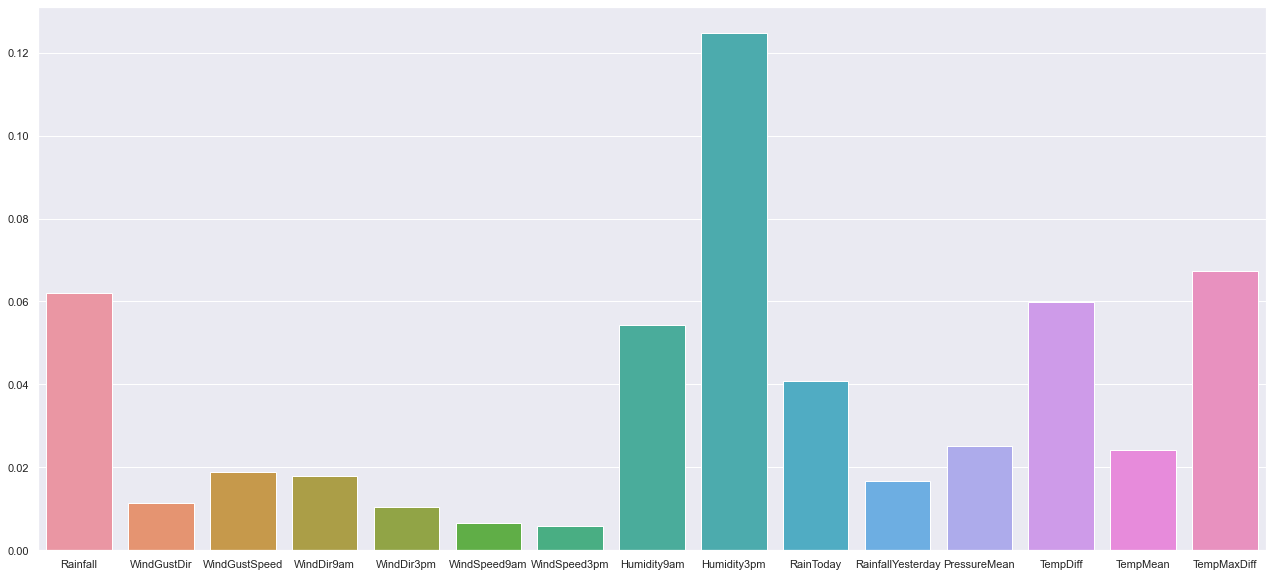

In [54]:
mi = select_features_continouos(X_train[mi_cols], X_train['RainfallTomorrow'])
plt.figure(figsize=(22,10))
sns.barplot(x=X_train[mi_cols].columns.values,y=mi);

In [55]:
# sns.pairplot(X_train.drop(drop_for_plot,axis=1))